In [213]:
#Cargar las librerias necesarias para la ejecución del proyecto modelo de predicción de retiros voluntarios

import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

In [214]:
#Cargar la base de datos con la cual vamos a trabajar en el proyecto
#Conocer 10 de los registros para entender la estructura de la base de datos

retiros=pd.read_csv("C:/Users/jforero/OneDrive - Grupo Bancolombia/91. Universidad - Especialización/Proyecto_Final_Retiros_Voluntarios/Retiros_historicos.csv")
retiros.head(10)

ID_EMPLEADOS                  COMPAÑÍA  CODIGO_AREA  \
0          3239          Bancolombia S.A.     70005072   
1          6119          Bancolombia S.A.         2738   
2         10332          Bancolombia S.A.     70005179   
3         14050          Bancolombia S.A.         1005   
4         15715          Bancolombia S.A.         2115   
5         19401  Valores Bancolombia S.A.     70004166   
6         21439          Bancolombia S.A.         1182   
7         25323  Valores Bancolombia S.A.     70004188   
8         47241          Bancolombia S.A.     70005312   
9         48330          Bancolombia S.A.          935   

                                    AREA  CODIGO_CARGO  \
0             SUC ARMENIA CENTRO CCIAL 1      99999999   
1           SUC BANCA COLOMBIA OVIEDO DS      99999999   
2                   SUC CALASANZ CCIAL 1      99999999   
3                       SUC PUERTO LOPEZ      99999999   
4                           SUC BELLO DS      99999999   
5   GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2      99999999   
6             SERVICIO SUC BOGOTA CENTRO      99999999   
7         GCIA CCIAL ACCIONES MEDELLIN 3      99999999   
8  LDC ANALISIS INTEGRACION Y DATOS 6 TI      99999999   
9      SERVICIO SUC CENTRO SURCOLOMBIANA      99999999   

                               CARGO           REGION      FORMA_DE_TRABAJO  \
0  Integración: Posición por defecto              Sur   Convencionados (CO)   
1  Integración: Posición por defecto        Antioquia  No Convencionad (CO)   
2  Integración: Posición por defecto        Antioquia   Convencionados (CO)   
3  Integración: Posición por defecto           Centro   Convencionados (CO)   
4  Integración: Posición por defecto        Antioquia   Convencionados (CO)   
5  Integración: Posición por defecto        Antioquia  No Convencionad (CO)   
6  Integración: Posición por defecto  Bogota y sabana   Convencionados (CO)   
7  Integración: Posición por defecto        Antioquia  No Convencionad (CO)   
8  Integración: Posición por defecto        Antioquia  No Convencionad (CO)   
9  Integración: Posición por defecto           Centro   Convencionados (CO)   

  CLASE_DE_MEDIDA             MOTIVO_RETIRO FECHA_DESDE  CODIGO_AREA_ANTERIOR  \
0     RETIRO (CO)  VOLUNTARIO ARREGLO MUTUO  31/03/2025            70005072.0   
1     RETIRO (CO)  VOLUNTARIO ARREGLO MUTUO  31/03/2025                2738.0   
2     RETIRO (CO)  VOLUNTARIO ARREGLO MUTUO  31/03/2025            70005179.0   
3     RETIRO (CO)  VOLUNTARIO ARREGLO MUTUO  31/03/2025                1005.0   
4     RETIRO (CO)  VOLUNTARIO ARREGLO MUTUO  31/03/2025                2115.0   
5     RETIRO (CO)         RETIRO VOLUNTARIO  31/03/2025            70004166.0   
6     RETIRO (CO)  VOLUNTARIO ARREGLO MUTUO  31/03/2025                1182.0   
7     RETIRO (CO)  VOLUNTARIO ARREGLO MUTUO  31/03/2025            70004188.0   
8     RETIRO (CO)         RETIRO VOLUNTARIO  31/03/2025            70005312.0   
9     RETIRO (CO)         RETIRO VOLUNTARIO  31/03/2025                 935.0   

   CODIGO_CARGO_ANTERIOR   AÑO PERIODO  \
0                73929.0  2025  mar-25   
1                28681.0  2025  mar-25   
2                54910.0  2025  mar-25   
3                67260.0  2025  mar-25   
4                52493.0  2025  mar-25   
5                22852.0  2025  mar-25   
6                 4360.0  2025  mar-25   
7                22849.0  2025  mar-25   
8                10356.0  2025  mar-25   
9                95286.0  2025  mar-25   

                                VP ACTUAL  \
0             VICEPRESIDENCIA DE NEGOCIOS   
1             VICEPRESIDENCIA DE NEGOCIOS   
2             VICEPRESIDENCIA DE NEGOCIOS   
3             VICEPRESIDENCIA DE NEGOCIOS   
4             VICEPRESIDENCIA DE NEGOCIOS   
5             VICEPRESIDENCIA DE NEGOCIOS   
6             VICEPRESIDENCIA DE NEGOCIOS   
7             VICEPRESIDENCIA DE NEGOCIOS   
8  VICEPRESIDENCIA SERVICIOS CORPORATIVOS   
9             VICEPRESIDENCIA DE NEGOCIOS   

    

# DESCRIPCION DE LAS FEATURES DE DATASET DE LAS NOVEDADES DE LOS EMPLEADOS:

ID_EMPLEADOS: Es el código único del empleados, sirve como identificador

COMPAÑÍA: Internamente la organización tiene varias subcompañias, acá el nombre de cada una

CODIGO_AREA: Es el código con el cual se identifica el área donde trabaja el empleado

AREA: Es la descripción del área donde trabaja el empleado

CODIGO_CARGO: Es el código con el cual se identifica el cargo del empleado

CARGO:Es la descripción del cargo donde trabaja el empleado

REGION: Esta distribuido en las 5 regiones de Colombia

FORMA_DE_TRABAJO: clasificación de organización, entre empleados operativos (convencionados) o  profesionales (no convencionados, en transición)

CLASE_DE_MEDIDA: Es la novedad que se le aplica al empleado de acuerdo a: contratación, retiro, impacto salarial, ascenso o traslado horizontal.

MOTIVO_RETIRO: Es el motivo detallado de la clase de medida

FECHA_DESDE: Es la fecha exacta en la cual se aplica la novedad del empleado

CODIGO_AREA_ANTERIOR:  Es el código con el cual se identifica el área del empleado antes de la novedad

CODIGO_CARGO_ANTERIOR: Es el código con el cual se identifica el cargo del empleado antes de la novedad

AÑO: Es al año en la cual se aplico la novedad

PERIODO: Es el mes y año en la cual se aplico la novedad

VP ACTUAL: Es la vicepresidencia (1er nivel) donde se encuentra estructuralmente el empleado

VP ANT:  Es la vicepresidencia (1er nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

2 ACT:  Es el área (2do nivel) donde se encuentra estructuralmente el empleado

2 ANT:   Es el área (2do nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

3 ACT:   Es el área (3cer nivel) donde se encuentra estructuralmente el empleado

3 ANT:   Es el área (3cer nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

4 ACT:   Es el área (4to nivel) donde se encuentra estructuralmente el empleado

4 ANT:   Es el área (4to nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

5 ACT:   Es el área (5to nivel) donde se encuentra estructuralmente el empleado

5 ANT:   Es el área (5to nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

NIVEL_DEL_CARGO: Es la clasificación del cargo de acuerdo a su descripción 

RED_DE_SUCURSALES: Es la clasificación de los empelados de acuerdo a los comerciales y administrativos

CARGO_ANTERIOR: Es la descripción del cargo antes de la novedad

COMPAÑÍA_AANTERIOR: Internamente la organización tiene varias subcompañias, acá el nombre de cada una, es la compañia antes de la novedad

NIVEL_DEL_CARGO_ANTERIOR: Es la clasificación del cargo de acuerdo a su descripción, antes de la novedad

GÉNERO: Es la identificación del sexo del empleado

In [215]:
#Conteo de registros por cada una de las variables
#Conocer la forma de la base de datos

print("Forma de la base de retiros (filas, columnas):", retiros.shape)
print(f"Total de registros: {retiros.shape[0]}")
print(f"Total de columnas: {retiros.shape[1]}")

Forma de la base de retiros (filas, columnas): (83142, 31)
Total de registros: 83142
Total de columnas: 31


In [216]:
#Conozcamos a nivel general el detalle de los columnas de la base de datos
#Conocer la cantidad de registros y columnas que tiene la base de datos

retiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83142 entries, 0 to 83141
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPLEADOS              83142 non-null  int64  
 1   COMPAÑÍA                  83142 non-null  object 
 2   CODIGO_AREA               83142 non-null  int64  
 3   AREA                      83131 non-null  object 
 4   CODIGO_CARGO              83142 non-null  int64  
 5   CARGO                     83142 non-null  object 
 6   REGION                    83142 non-null  object 
 7   FORMA_DE_TRABAJO          83142 non-null  object 
 8   CLASE_DE_MEDIDA           83142 non-null  object 
 9   MOTIVO_RETIRO             83142 non-null  object 
 10  FECHA_DESDE               83142 non-null  object 
 11  CODIGO_AREA_ANTERIOR      70055 non-null  float64
 12  CODIGO_CARGO_ANTERIOR     66875 non-null  float64
 13  AÑO                       83142 non-null  int64  
 14  PERIOD

In [217]:
#con este código podemos observar todas las columnas del df de forma aleatoria en sus registros

pd.set_option("display.max_columns",None)              
retiros.sample(2)

ID_EMPLEADOS          COMPAÑÍA  CODIGO_AREA  \
19111         55817  Bancolombia S.A.         2194   
82392         15008  Bancolombia S.A.         4511   

                                AREA  CODIGO_CARGO                    CARGO  \
19111     SERVICIOS FINALIZACION LRU         25939  AUXILIAR ADMINISTRATIVO   
82392  SECCION CREDITO EMPRESARIAL 1         24438              ANALISTA II   

                REGION      FORMA_DE_TRABAJO                CLASE_DE_MEDIDA  \
19111        Antioquia   Convencionados (CO)  CAMBIO ORG. CON CAM. REM (CO)   
82392  Dirección gener  No Convencionad (CO)  CAMBIO ORG. SIN CAM. REM (CO)   

             MOTIVO_RETIRO FECHA_DESDE  CODIGO_AREA_ANTERIOR  \
19111            PROMOCIÓN   5/11/2024                2194.0   
82392  TRASLADO HORIZONTAL  16/02/2014                 339.0   

       CODIGO_CARGO_ANTERIOR   AÑO PERIODO                    VP ACTUAL  \
19111             70074879.0  2024  nov-24  VICEPRESIDENCIA DE NEGOCIOS   
82392                24438.0  2014  feb-14   VICEPRESIDENCIA DE RIESGOS   

                                       VP ANT  \
19111             VICEPRESIDENCIA DE NEGOCIOS   
82392  VICEPRESIDENCIA SERVICIOS CORPORATIVOS   

                                     2 ACT  \
19111  VICEPRESIDENCIA LEASING RENTA Y USO   
82392  VICEPRESIDENCIA DE RIESGOS COLOMBIA   

                                        2 ANT  \
19111     VICEPRESIDENCIA LEASING RENTA Y USO   
82392  VICEPRESIDENCIA SERV PARA LOS CLIENTES   

                                        3 ACT  \
19111  EVC SERVICIOS ESTRATEGICOS NEGOCIO LRU   
82392    DIRECCION DE CREDITO BANCA EMP Y GOB   

                                        3 ANT  \
19111  EVC SERVICIOS ESTRATEGICOS NEGOCIO LRU   
82392   DIRECCION DE SERVICIOS EMPRESAS Y GOB   

                                        4 ACT  \
19111              SERVICIOS FINALIZACION LRU   
82392  GCIA DE CREDITO BANCA EMPRE Y GOBIERNO   

                                      4 ANT                          5 ACT  \
19111            SERVICIOS FINALIZACION LRU                      NO APLICA   
82392  GCIA ORIGINACION CREDITO EMPRESARIAL  SECCION CREDITO EMPRESARIAL 1   

           5 ANT NIVEL_DEL_CARGO            RED_DE_SUCURSALES  \
19111  NO APLICA       OPERATIVO  GRUPO SIN RED DE SUCURSALES   
82392  NO APLICA   PROFESIONALES  GRUPO SIN RED DE SUCURSALES   

                CARGO_ANTERIOR COMPAÑÍA_AANTERIOR NIVEL_DEL_CARGO_ANTERIOR  \
19111  AUXILIAR DEPARTAMENTO I   Bancolombia S.A.                OPERATIVO   
82392              ANALISTA II   Bancolombia S.A.            PROFESIONALES   

          GÉNERO  
19111  masculino  
82392  Masculino

In [218]:
#Conocer los valores unicos por clase de medida
retiros["CLASE_DE_MEDIDA"].value_counts()     



CLASE_DE_MEDIDA
CAMBIO ORG. SIN CAM. REM (CO)    25292
CAMBIO ORG. CON CAM. REM (CO)    25086
RETIRO (CO)                      16174
CONTRATACION (CO)                13075
IMPACTO SALARIAL (CO)             3514
RECONTRATACION (CO)                  1
Name: count, dtype: int64

In [219]:
#En el campo de clase de medida, debemos finalmente dejar 2 clases para poder realizar el modelo de predicción, estos son: ACTIVO o RETIRO, en ese sentido, las clasificaciones diferentes a RETIRO serán reemplazadas por ACTIVO

retiros['CLASE_DE_MEDIDA'] = retiros['CLASE_DE_MEDIDA'].replace({
    'CAMBIO ORG. SIN CAM. REM (CO)': 'ACTIVO',
    'CAMBIO ORG. CON CAM. REM (CO)': 'ACTIVO',
    'CONTRATACION (CO)': 'ACTIVO',
    'IMPACTO SALARIAL (CO)': 'ACTIVO',
    'RECONTRATACION (CO)': 'ACTIVO'
})

In [220]:
#Validamos si efectivamente el cambio fue aplicado

print(retiros['CLASE_DE_MEDIDA'].value_counts())

CLASE_DE_MEDIDA
ACTIVO         66968
RETIRO (CO)    16174
Name: count, dtype: int64


In [221]:
# Limpieza de la clase RETIRO, quiero quitar el nombre RETIRO (CO) y dejar solo RETIRO

retiros['CLASE_DE_MEDIDA'] = retiros['CLASE_DE_MEDIDA'].replace({
    'RETIRO (CO)': 'RETIRO',
    })

In [222]:
#Validamos finalmente como quedan las 2 clases de la columna con la cual vamos a predecir:

print(retiros['CLASE_DE_MEDIDA'].value_counts())

CLASE_DE_MEDIDA
ACTIVO    66968
RETIRO    16174
Name: count, dtype: int64


Con el código anterior se evidencia que finalmente tenemos 2 clases, cuya proporción es: ACTIVO: 76% y RETIRO: 24%; Según las recomendaciones y literatura es una buena proporción, y no se evidencia inicialmente problemas de desbalanceo.

In [223]:
#Conocer los Valores unicos por campo:  motivo de retiro, el cual tiene el detalle de los motivos por los cuales se retiran los empleados
retiros["MOTIVO_RETIRO"].value_counts()  

MOTIVO_RETIRO
PROMOCIÓN                         23787
TRASLADO HORIZONTAL               21313
CONTRATACIÓN                      13070
VOLUNTARIO ARREGLO MUTUO           6149
RETIRO VOLUNTARIO                  5180
TRASLADO POR CAMBIO DE OFICINA     3147
RETIRO SIN JUSTA CAUSA             1819
MOD. POR CAMBIO DE JORNADA         1708
RETIRO POR JUSTA CAUSA             1513
AUMENTO POR NIVELACIÓN             1280
SUSTITUCION PATRONAL INTERNA       1278
DESCENSO                            800
FINALIZACIÓN CONTRATO TÉRMINO       635
RETIRO POR PENSIÓN                  570
AUMENTO POR 20 AÑOS SERVICIO        465
RETIRO EN PERIODO DE PRUEBA         160
RETIRO POR FALLECIMIENTO            110
CAMBIO RÉGIMEN NUEVO A INTEGRA       61
RETIRO POR SUSTITUCIÓN PATRONA       22
TRASLADO X DESCENSO                  14
SUSTITUCION PATRONAL EXTERNA         13
REINTEGRO                            11
RETIRO POR OTRAS CAUSAS              10
IMPLEMENTACIÓN ESCALAFÓN              8
CUBRIMIENTO DE VACANTE    

IMPORTANTE: Tener en cuenta que no todos los retiros se pueden predecir, debido a que tenemos algunos motivos de retiro como: jubilación, justa causa, mutuo acuerdo, entre otros que no se pueden controlar, en ese sentido, vamos a revisar la columna de "motivo de medida" y poder tener en cuenta solo los motivos de: RETIRO VOLUNTARIO y RETIRO VOLUNTARIO ARREGLO MUTUO.

In [224]:
#Hacemos la homologación y validamos:

retiros['MOTIVO_RETIRO'] = retiros['MOTIVO_RETIRO'].replace({
    'VOLUNTARIO ARREGLO MUTUO': 'RETIRO',
    'RETIRO VOLUNTARIO': 'RETIRO'
})
retiros["MOTIVO_RETIRO"].value_counts()  

MOTIVO_RETIRO
PROMOCIÓN                         23787
TRASLADO HORIZONTAL               21313
CONTRATACIÓN                      13070
RETIRO                            11329
TRASLADO POR CAMBIO DE OFICINA     3147
RETIRO SIN JUSTA CAUSA             1819
MOD. POR CAMBIO DE JORNADA         1708
RETIRO POR JUSTA CAUSA             1513
AUMENTO POR NIVELACIÓN             1280
SUSTITUCION PATRONAL INTERNA       1278
DESCENSO                            800
FINALIZACIÓN CONTRATO TÉRMINO       635
RETIRO POR PENSIÓN                  570
AUMENTO POR 20 AÑOS SERVICIO        465
RETIRO EN PERIODO DE PRUEBA         160
RETIRO POR FALLECIMIENTO            110
CAMBIO RÉGIMEN NUEVO A INTEGRA       61
RETIRO POR SUSTITUCIÓN PATRONA       22
TRASLADO X DESCENSO                  14
SUSTITUCION PATRONAL EXTERNA         13
REINTEGRO                            11
RETIRO POR OTRAS CAUSAS              10
IMPLEMENTACIÓN ESCALAFÓN              8
CUBRIMIENTO DE VACANTE                5
CANCELACIÓN CONTRATO TÉRMI

In [225]:
# Teniendo en cuenta el punto anterior, se debe dejar el DATASET solo con los activos y con los retiros que icnluyan el motivo de la medida: RETIRO (El cual significa retiros voluntario y voluntario arreglo mutuo)
#Llamaremos el nuevo Dataset como retiros_definitivos
retiros_definitivos = retiros[
    ((retiros['CLASE_DE_MEDIDA'] == 'RETIRO') & (retiros['MOTIVO_RETIRO'] == 'RETIRO')) |
    (retiros['CLASE_DE_MEDIDA'] == 'ACTIVO')
]

In [226]:
#Validamos la cantidad de registros que tenemos en el nuevo dataset

print(retiros_definitivos['CLASE_DE_MEDIDA'].value_counts())

CLASE_DE_MEDIDA
ACTIVO    66968
RETIRO    11329
Name: count, dtype: int64


Con este cambio del Dataset las 2 clases quedaron así: ACTIVO (86%) y RETIRO (14%), con está distribución las muestras quedan desbalanceadas, sin embargo, vamos a hacer el modelo con esta información y dependiendo de los resultados validamos si debemos aplicar alguna técnica avanzada.

## LIMPIEZA Y TRANSFORMACIÓN DE LOS DATOS

In [227]:
#Con el nuevo DataSet vamos a hacer transformación y limpieza de datos
retiros_definitivos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78297 entries, 0 to 83141
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPLEADOS              78297 non-null  int64  
 1   COMPAÑÍA                  78297 non-null  object 
 2   CODIGO_AREA               78297 non-null  int64  
 3   AREA                      78286 non-null  object 
 4   CODIGO_CARGO              78297 non-null  int64  
 5   CARGO                     78297 non-null  object 
 6   REGION                    78297 non-null  object 
 7   FORMA_DE_TRABAJO          78297 non-null  object 
 8   CLASE_DE_MEDIDA           78297 non-null  object 
 9   MOTIVO_RETIRO             78297 non-null  object 
 10  FECHA_DESDE               78297 non-null  object 
 11  CODIGO_AREA_ANTERIOR      65211 non-null  float64
 12  CODIGO_CARGO_ANTERIOR     62335 non-null  float64
 13  AÑO                       78297 non-null  int64  
 14  PERIODO    

Existe algunas columnas que no son necesarias para el modelo de predicción, por lo tanto, se deben eliminar
Las columnas que no son necesarias para el modelo de predicción son:

1. Las columnas que son del cargo anterior no son necesarias porque no vamos a analizar novedades internas sino retiros: COMPAÑÍA_AANTERIOR, NIVEL_DEL_CARGO_ANTERIOR

2. Códigos que son generales y no generan valor como: CODIGO_AREA, CODIGO_CARGO, CODIGO_AREA_ANTERIOR, CODIGO_CARGO_ANTERIOR.

3. Quitar el campo MOTIVO_RETIRO porque con los ajustes anteriores el campo necesario es CLASE_DE_MEDIDA

4. Existen 2 campos que traducen la fecha de la novedad, dejamos la fecha más completa, por ende depuramos: AÑO, PERIODO

5. Dentro del Dataset tenemos los niveles de estructura de la organización, por eso quitamos los niveles actuales y anteriores: VP ANT, 2 ACT, 2 ANT, 3 ACT, 3 ANT, 4 ACT, 4 ANT, 5 ACT, 5 ANT

In [228]:
#Creamos en nuevo Dataset depurando las columnas que no son necesarias para el modelo de predicción

columnas_a_eliminar = ['CODIGO_AREA', 'CODIGO_CARGO', 'MOTIVO_RETIRO', 'CODIGO_AREA_ANTERIOR', 'CODIGO_CARGO_ANTERIOR','NIVEL_DEL_CARGO_ANTERIOR', 'AÑO', "PERIODO", "COMPAÑÍA_AANTERIOR", "VP ANT", "2 ACT", "2 ANT", "3 ACT", "3 ANT", "4 ACT", "4 ANT", "5 ACT", "5 ANT"]  
retiros_modelo = retiros_definitivos.drop(columns=columnas_a_eliminar)

In [229]:
# Conocer el nuevo Dataset y la cantidad de registros que tenemos
print("Forma de la base de retiros (filas, columnas):", retiros_modelo.shape)
print(f"Total de registros: {retiros_modelo.shape[0]}")
print(f"Total de columnas: {retiros_modelo.shape[1]}")

Forma de la base de retiros (filas, columnas): (78297, 13)
Total de registros: 78297
Total de columnas: 13


In [230]:
# Conocer detalle de cada uno de las Features
retiros_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78297 entries, 0 to 83141
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID_EMPLEADOS       78297 non-null  int64 
 1   COMPAÑÍA           78297 non-null  object
 2   AREA               78286 non-null  object
 3   CARGO              78297 non-null  object
 4   REGION             78297 non-null  object
 5   FORMA_DE_TRABAJO   78297 non-null  object
 6   CLASE_DE_MEDIDA    78297 non-null  object
 7   FECHA_DESDE        78297 non-null  object
 8   VP ACTUAL          78285 non-null  object
 9   NIVEL_DEL_CARGO    75951 non-null  object
 10  RED_DE_SUCURSALES  75951 non-null  object
 11  CARGO_ANTERIOR     72110 non-null  object
 12  GÉNERO             78297 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.4+ MB


In [231]:
#Conociendo el tipo de dato de cada uno de los Features, vamos a hacer la transformación de los datos para que sean numéricos y no categóricos
#Transformamos la columna de fecha a tipo datetime
retiros_modelo['FECHA_DESDE'] = pd.to_datetime(retiros_modelo['FECHA_DESDE'], format='%d/%m/%Y', errors='coerce')

In [232]:
#Seguimos con la transformación de algunas features en categoricas 
retiros_modelo['GÉNERO'] = retiros_modelo['GÉNERO'].astype('category')
retiros_modelo['CLASE_DE_MEDIDA'] = retiros_modelo['CLASE_DE_MEDIDA'].astype('category')
retiros_modelo['REGION'] = retiros_modelo['REGION'].astype('category')
retiros_modelo['FORMA_DE_TRABAJO'] = retiros_modelo['FORMA_DE_TRABAJO'].astype('category')
retiros_modelo['RED_DE_SUCURSALES'] = retiros_modelo['RED_DE_SUCURSALES'].astype('category')

In [233]:
#Finalmente hacemos validación del tio de dato de las Features
print(retiros_modelo.dtypes)

ID_EMPLEADOS                  int64
COMPAÑÍA                     object
AREA                         object
CARGO                        object
REGION                     category
FORMA_DE_TRABAJO           category
CLASE_DE_MEDIDA            category
FECHA_DESDE          datetime64[ns]
VP ACTUAL                    object
NIVEL_DEL_CARGO              object
RED_DE_SUCURSALES          category
CARGO_ANTERIOR               object
GÉNERO                     category
dtype: object


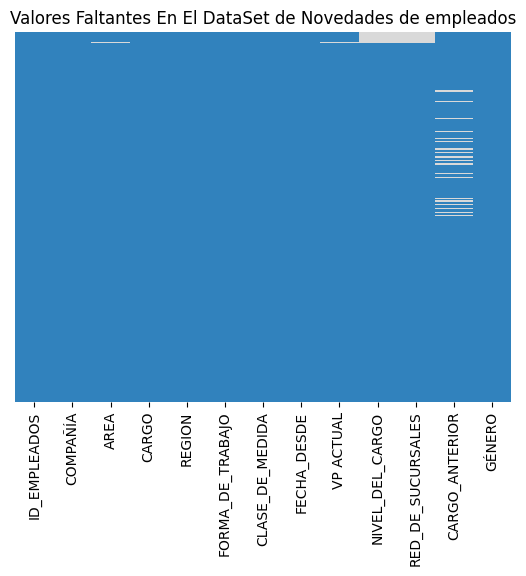

In [234]:
#Identificar datos faltantes de los features del dataset
sns.heatmap(retiros_modelo.isnull(), yticklabels=False, cbar=False, cmap='tab20c')
plt.title('Valores Faltantes En El DataSet de Novedades de empleados')
plt.show()

Se evidencia que los campos de: AREA, VP ACTUAL, NIVEL_DEL_CARGO, RED_DE_SUCURSALES y CARGO_ANTERIOR tienen nulos, pero no están muy concentrados, es decir, a pesar que existen nulos no superan un 30% para ser una variable a eliminar, siendo así, vamos a trabajar en la imputación de esos campos nulos.

In [235]:
#Haciendo un análisis de los campos nulos (faltantes) en el dataset, se puede afirmar que los campos: área, VP Actual y cargo anterior se pueden diligenciar con NO APLICA, porque algunos de estos pueden ser contrataciones, y al ser una contratación nueva no le han asignado aún el área, la vicepresidencia y no tenian cargo actual

#En ese sentido, se reemplazan los valores nulos por NO APLICA
retiros_modelo['AREA'].fillna('NO APLICA', inplace=True)
retiros_modelo['VP ACTUAL'].fillna('NO APLICA', inplace=True)
retiros_modelo['CARGO_ANTERIOR'].fillna('NO APLICA', inplace=True)



C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1002856373.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retiros_modelo['AREA'].fillna('NO APLICA', inplace=True)
C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1002856373.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

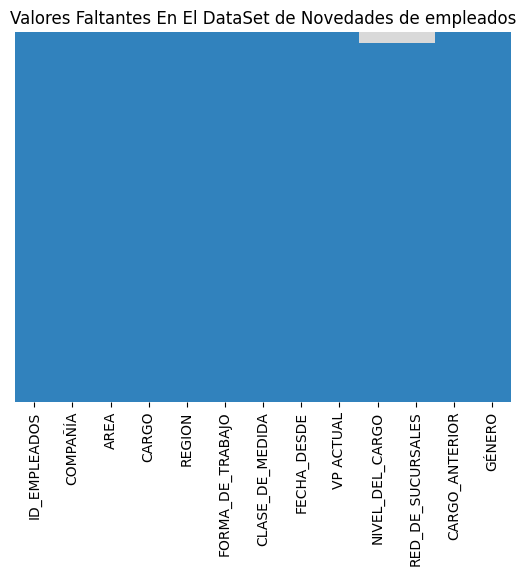

In [236]:
#Validamos nuevamente los datos faltantes
sns.heatmap(retiros_modelo.isnull(), yticklabels=False, cbar=False, cmap='tab20c')
plt.title('Valores Faltantes En El DataSet de Novedades de empleados')
plt.show()

In [237]:
#Según la validación y el gráfico anterior, solo tendríamos nulos en NIVEL_DEL_CARGO y RED_DE_SUCURSALES, vamos a conocer cuantos registros son
print("Cantidad de registros nulos en NIVEL_DEL_CARGO:", retiros_modelo['NIVEL_DEL_CARGO'].isnull().sum())
print("Cantidad de registros nulos en RED_DE_SUCURSALES:", retiros_modelo['RED_DE_SUCURSALES'].isnull().sum())


Cantidad de registros nulos en NIVEL_DEL_CARGO: 2346
Cantidad de registros nulos en RED_DE_SUCURSALES: 2346


In [238]:
#Son exactamente la misma cantidad de registros, es una proporción relativamente pequeña con respecto al dataset completo, pero, son registros que no podemos eliminar, por ese motivo vamos a imputar con la moda ya que son datos categoricos
#primero conocemos las medidas de tendencia central de los campos que tienen nulos
print("Moda de NIVEL_DEL_CARGO:", retiros_modelo['NIVEL_DEL_CARGO'].mode()[0])
print("Moda de RED_DE_SUCURSALES:", retiros_modelo['RED_DE_SUCURSALES'].mode()[0])


Moda de NIVEL_DEL_CARGO: OPERATIVO
Moda de RED_DE_SUCURSALES: GRUPO SIN RED DE SUCURSALES


In [239]:
#imputamos los nulos de los campos NIVEL_DE_CARGO y RED_DE_SUCURSALES con la moda

retiros_modelo['NIVEL_DEL_CARGO'].fillna(retiros_modelo['NIVEL_DEL_CARGO'].mode()[0], inplace=True)
retiros_modelo['RED_DE_SUCURSALES'].fillna(retiros_modelo['RED_DE_SUCURSALES'].mode()[0], inplace=True)


C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1267487543.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retiros_modelo['NIVEL_DEL_CARGO'].fillna(retiros_modelo['NIVEL_DEL_CARGO'].mode()[0], inplace=True)
C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1267487543.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [240]:
#Validamos finalmente la cantidad de nulos que tenemos en el dataset
print("Cantidad de registros nulos en NIVEL_DEL_CARGO:", retiros_modelo['NIVEL_DEL_CARGO'].isnull().sum())
print("Cantidad de registros nulos en RED_DE_SUCURSALES:", retiros_modelo['RED_DE_SUCURSALES'].isnull().sum())


Cantidad de registros nulos en NIVEL_DEL_CARGO: 0
Cantidad de registros nulos en RED_DE_SUCURSALES: 0


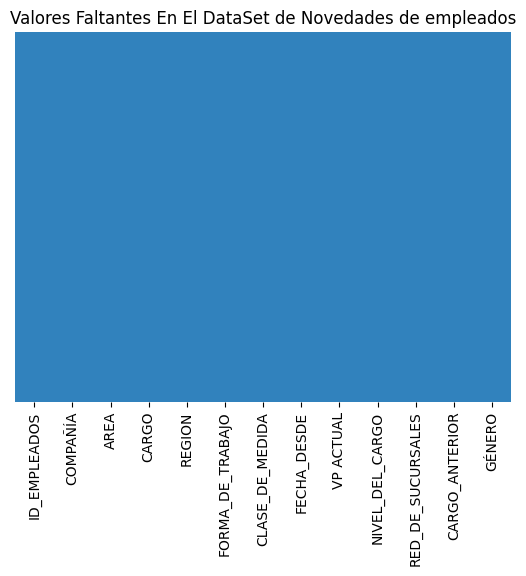

In [241]:
#graficamente a continuación nos damos cuenta que ya no tenemos datos nulos
sns.heatmap(retiros_modelo.isnull(), yticklabels=False, cbar=False, cmap='tab20c')
plt.title('Valores Faltantes En El DataSet de Novedades de empleados')
plt.show()

In [242]:
#Ahora vamos a revisar los registros duplicados que tenemos en el dataset
print("Cantidad de registros duplicados:", retiros_modelo.duplicated().sum())

Cantidad de registros duplicados: 12


In [243]:
#Según la consulta anterior tenemos 12 registros duplicados, vamos a conocerlos
duplicados = retiros_modelo[retiros_modelo.duplicated(keep=False)]
print(duplicados)

       ID_EMPLEADOS                  COMPAÑÍA  \
701            8461          Bancolombia S.A.   
717            8461          Bancolombia S.A.   
17005      90061032  Valores Bancolombia S.A.   
17009      90061032  Valores Bancolombia S.A.   
19053      90049201          Bancolombia S.A.   
19081      90049201          Bancolombia S.A.   
21208      90046660          Bancolombia S.A.   
21225      90046660          Bancolombia S.A.   
66757         35454  Valores Bancolombia S.A.   
66758         35454  Valores Bancolombia S.A.   
68777         20062          Bancolombia S.A.   
68778         20062          Bancolombia S.A.   
69602         39267          Bancolombia S.A.   
69603         39267          Bancolombia S.A.   
73340         35893          Bancolombia S.A.   
73341         35893          Bancolombia S.A.   
76951         19291          Bancolombia S.A.   
76952         19291          Bancolombia S.A.   
77503         30752          Bancolombia S.A.   
77504         30752 

In [244]:
#Después de analizar los registros duplicados, se puede concluir que son registros que no tienen sentido, por lo tanto, se eliminan
retiros_modelo = retiros_modelo.drop_duplicates()   
print("Cantidad de registros duplicados:", retiros_modelo.duplicated().sum())


Cantidad de registros duplicados: 0


In [245]:
#Validamos nuevamente la forma del dataset
print("Forma de la base de retiros (filas, columnas):", retiros_modelo.shape)
print(f"Total de registros: {retiros_modelo.shape[0]}")
print(f"Total de columnas: {retiros_modelo.shape[1]}")
print("-----------------")
#Conocer el detalle de los registros del dataset
retiros_modelo.info()

Forma de la base de retiros (filas, columnas): (78285, 13)
Total de registros: 78285
Total de columnas: 13
-----------------
<class 'pandas.core.frame.DataFrame'>
Index: 78285 entries, 0 to 83141
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_EMPLEADOS       78285 non-null  int64         
 1   COMPAÑÍA           78285 non-null  object        
 2   AREA               78285 non-null  object        
 3   CARGO              78285 non-null  object        
 4   REGION             78285 non-null  category      
 5   FORMA_DE_TRABAJO   78285 non-null  category      
 6   CLASE_DE_MEDIDA    78285 non-null  category      
 7   FECHA_DESDE        78285 non-null  datetime64[ns]
 8   VP ACTUAL          78285 non-null  object        
 9   NIVEL_DEL_CARGO    78285 non-null  object        
 10  RED_DE_SUCURSALES  78285 non-null  category      
 11  CARGO_ANTERIOR     78285 non-null  object        
 

Se evidencia que efectivamente se eliminaron los 12 registros duplicados del Dataset

# ANALITICA DESCRIPTIVA DE LAS FEATURES E INGENIERA DE LOS DATOS

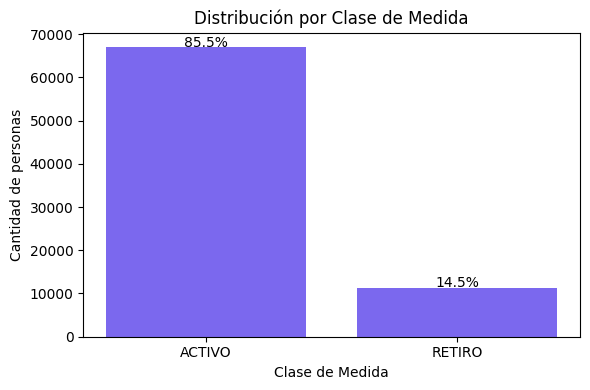

In [246]:
#GRAFICO DE BARRAS PARA CONOCER LOS REGISTROS POR CADA UNA DE LAS CLASES DE MEDIDA Y SU PROPORCION
#Vamos a graficar la cantidad de registros por cada una de las clases de medida, para conocer la proporción de cada una de ellas

conteo = retiros_modelo['CLASE_DE_MEDIDA'].value_counts()
porcentaje = conteo / conteo.sum() * 100

# Gráfico
plt.figure(figsize=(6, 4))
bars = plt.bar(conteo.index, conteo.values, color='mediumslateblue')

# Agregar porcentaje sobre cada barra
for bar, pct in zip(bars, porcentaje):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{pct:.1f}%', 
             ha='center', fontsize=10)

plt.title('Distribución por Clase de Medida')
plt.xlabel('Clase de Medida')
plt.ylabel('Cantidad de personas')
plt.tight_layout()
plt.show()

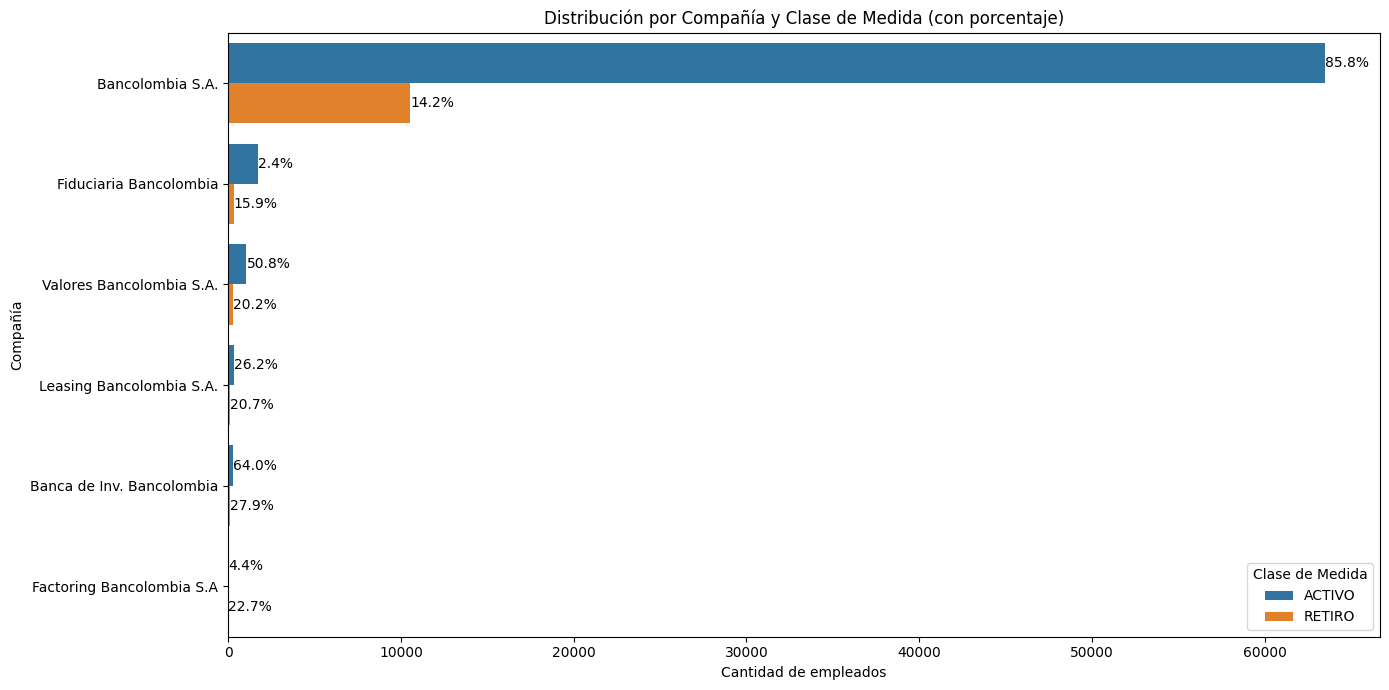

In [247]:
#Grafico por compañia de negocio o NIT donde se encuentra el empleado

plt.figure(figsize=(14, 7))
ax = sns.countplot(data=retiros_modelo, y='COMPAÑÍA', hue='CLASE_DE_MEDIDA', order=retiros_modelo['COMPAÑÍA'].value_counts().index)

# Calcular totales por compañía
totales = retiros_modelo.groupby('COMPAÑÍA').size()

# Agregar porcentaje a cada barra
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        compañia = bar.get_y()
        compañia_nombre = ax.get_yticklabels()[int(compañia)].get_text()  # Obtener nombre de la compañía desde el índice de la etiqueta

        porcentaje = width / totales[compañia_nombre] * 100
        ax.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{porcentaje:.1f}%', va='center')

plt.title('Distribución por Compañía y Clase de Medida (con porcentaje)')
plt.xlabel('Cantidad de empleados')
plt.ylabel('Compañía')
plt.legend(title='Clase de Medida')
plt.tight_layout()
plt.show()


En el grafico anterior se evidencia una gran concentración en la compañia Bancolombia de aproximadamente el 95% (activo 86% y retiro 14%), esto significa que posiblemente sea una variable que no sea tan relevante en el modelo y la podamos posiblemente descartar.

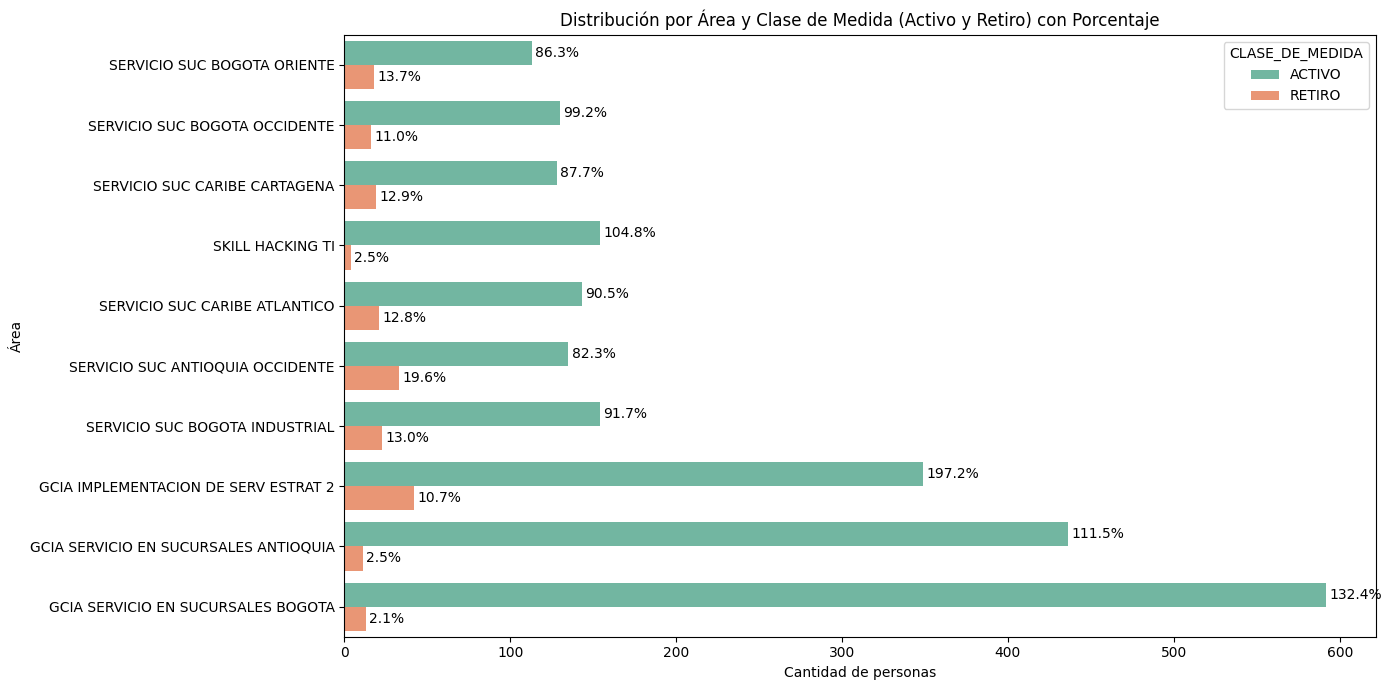

In [248]:

conteo = retiros_modelo['AREA'].value_counts().head(10)
porcentajes = conteo / conteo.sum() * 100

# Filtrar los datos para las 10 áreas más frecuentes
top_areas = retiros_modelo[retiros_modelo['AREA'].isin(conteo.index)]

# Crear gráfico de barras horizontales con CLASE_DE_MEDIDA
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=top_areas, y='AREA', hue='CLASE_DE_MEDIDA', order=conteo.index[::-1], palette="Set2")

# Calcular los totales por área para calcular los porcentajes
totales = top_areas['AREA'].value_counts()

# Agregar porcentaje a cada barra
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        area = bar.get_y() + bar.get_height() / 2  # Obtener la posición de la barra
        area_nombre = ax.get_yticklabels()[int(area)].get_text()  # Obtener el nombre del área desde el eje y

        porcentaje = width / totales[area_nombre] * 100
        ax.text(width + 2, bar.get_y() + bar.get_height() / 2, f'{porcentaje:.1f}%', va='center')

# Título y etiquetas
plt.title('Distribución por Área y Clase de Medida (Activo y Retiro) con Porcentaje')
plt.xlabel('Cantidad de personas')
plt.ylabel('Área')
plt.tight_layout()
plt.show()

Este campo de área nos puede funcionar muy bien para entender desde el analisis descriptivo donde tenemos una concentración de retiros, pero al ser tantas áreas y tener también el campo VP Actual (que resume el área) consideramos que es un campo que no es necesario tener en el modelo

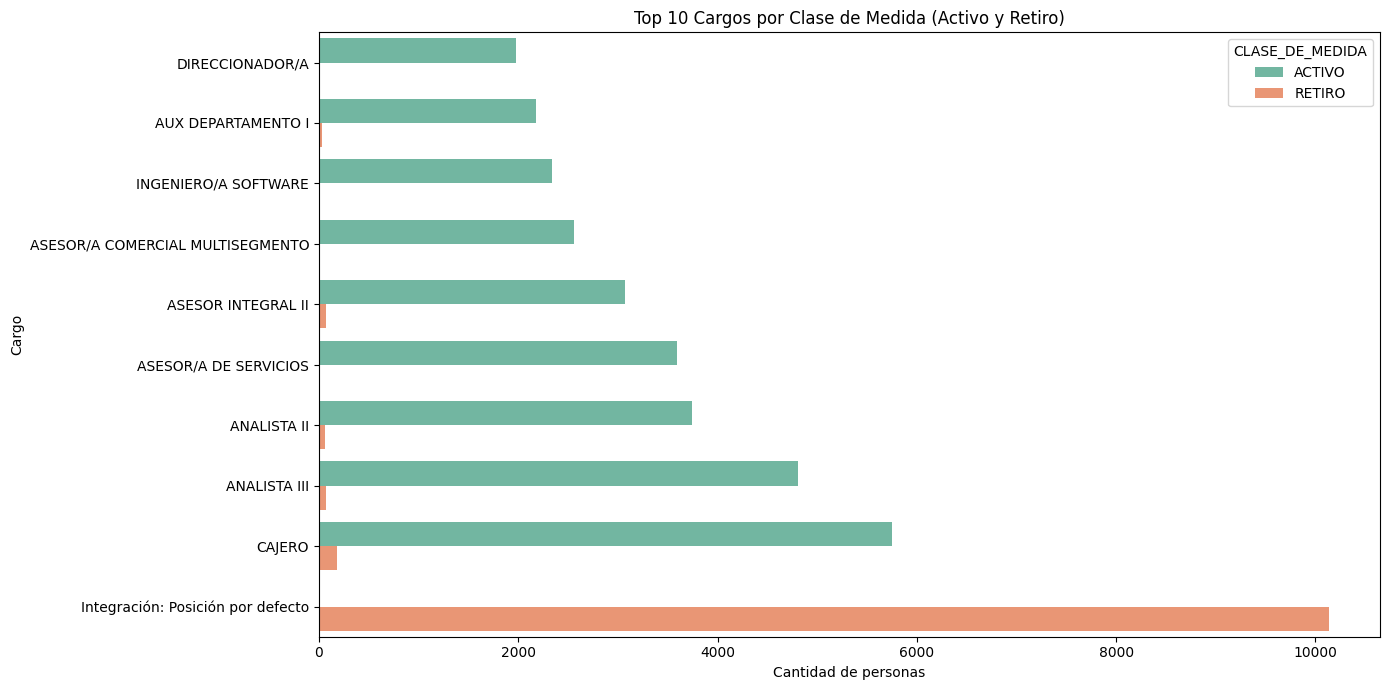

In [249]:
#Conocer el detalle del cargo, cómo son tantas clasificaciones, lo ideal es extraer el top 10 de los cargos más frecuentes

top_cargos = retiros_modelo['CARGO'].value_counts().head(10).index

# Filtrar la base con solo los cargos del top 10
df_top_cargos = retiros_modelo[retiros_modelo['CARGO'].isin(top_cargos)]

# Crear gráfico
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df_top_cargos, 
                   y='CARGO', 
                   hue='CLASE_DE_MEDIDA', 
                   order=top_cargos[::-1],  # para que el más alto aparezca arriba
                   palette='Set2')

# Título y etiquetas
plt.title('Top 10 Cargos por Clase de Medida (Activo y Retiro)')
plt.xlabel('Cantidad de personas')
plt.ylabel('Cargo')
plt.tight_layout()
plt.show()

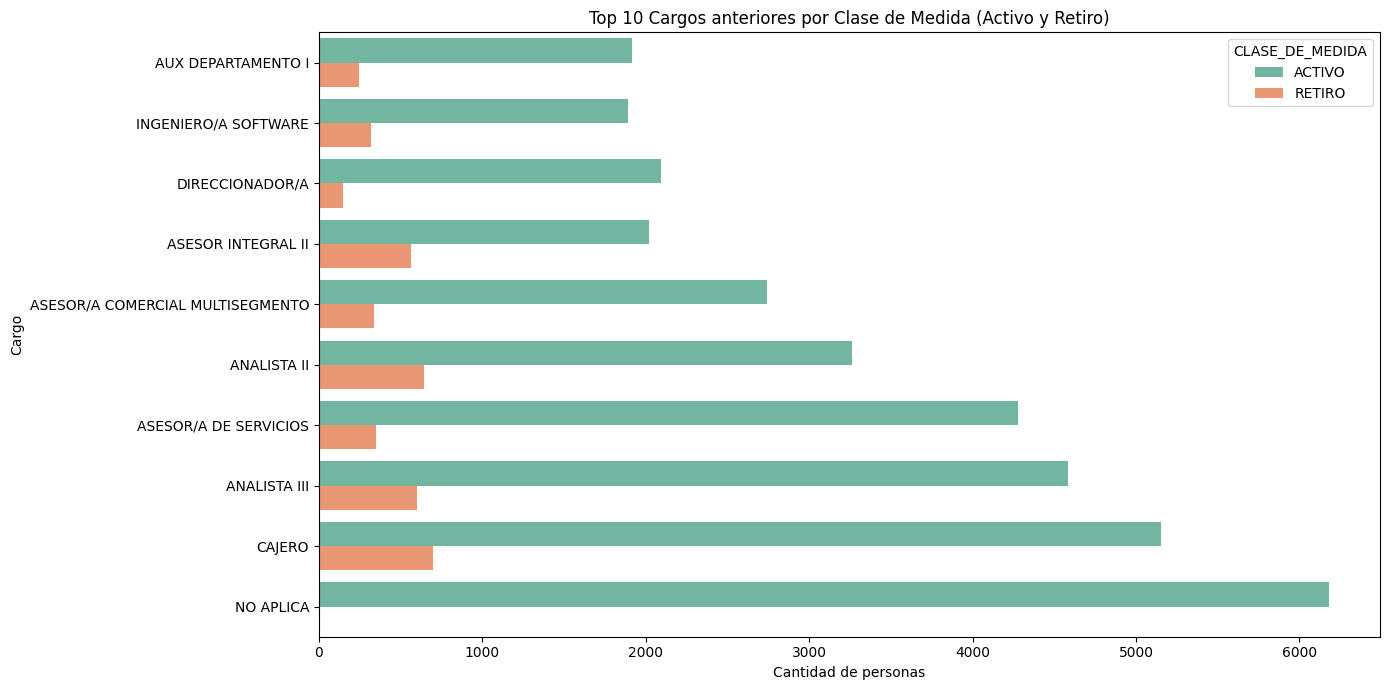

In [250]:
#Conocer el comportamietno de los cargos, pero esta vez desde : cargo anterior

#Conocer el detalle del cargo, cómo son tantas clasificaciones, lo ideal es extraer el top 10 de los cargos más frecuentes

top_cargos = retiros_modelo['CARGO_ANTERIOR'].value_counts().head(10).index

# Filtrar la base con solo los cargos del top 10
df_top_cargos = retiros_modelo[retiros_modelo['CARGO_ANTERIOR'].isin(top_cargos)]

# Crear gráfico
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df_top_cargos, 
                   y='CARGO_ANTERIOR', 
                   hue='CLASE_DE_MEDIDA', 
                   order=top_cargos[::-1],  # para que el más alto aparezca arriba
                   palette='Set2')

# Título y etiquetas
plt.title('Top 10 Cargos anteriores por Clase de Medida (Activo y Retiro)')
plt.xlabel('Cantidad de personas')
plt.ylabel('Cargo')
plt.tight_layout()
plt.show()

Se evidencia una concentración de retiros en los cargos de: cajero, analista iii, asesor de servicio, analista ii, y asesor ingtegral ii, 

La mayor concentración se enceuntra en la demoninación: Integración: posición por defecto; Validando con el negocio podemos entender que esta m arcación se pone por defecto cuando un empleado se retira de la organización, por este motivo se evidencia gran concentración acá, en ese sentido, descartamos está variable y vamos a hacer la validación con cargo_anterior.

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\836782632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retiros_modelo, x='GÉNERO', palette='Set2')


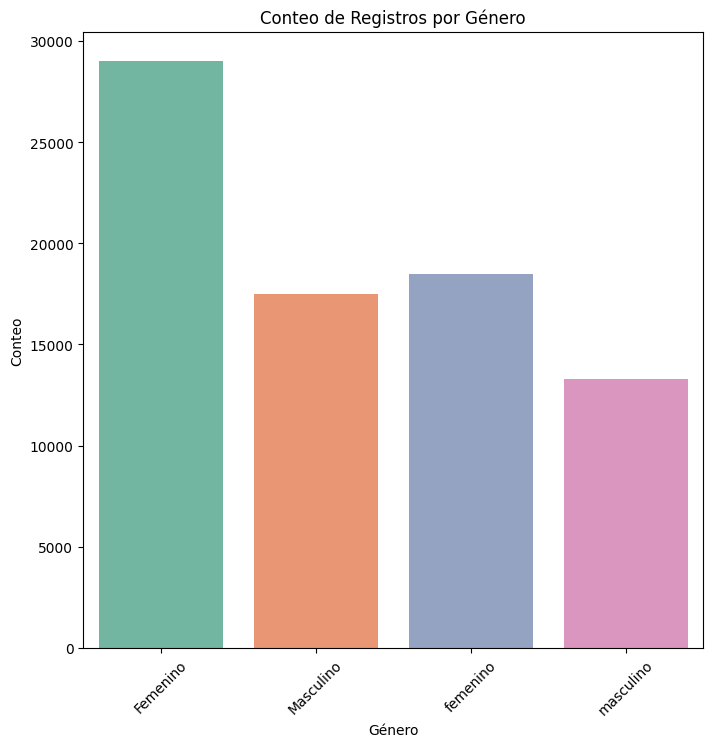

In [251]:
#Grafica de barras para conocer la proporción por género
plt.figure(figsize=(8, 8))
sns.countplot(data=retiros_modelo, x='GÉNERO', palette='Set2')
plt.title('Conteo de Registros por Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()



In [252]:
#Según el grafico anterior se evidencia que tenemos un error en la calidad de los datos, por ese motivo vamos a reemplazar los valores de género en mayuscula
#por los valores en minuscula, para que sean homogeneos
#Reemplazamos los valores de la columna GÉNERO
retiros_modelo['GÉNERO'] = retiros_modelo['GÉNERO'].replace({
    'M': 'masculino',
    'F': 'femenino',
    'Masculino': 'masculino',
    'Femenino': 'femenino',
    'masculino': 'masculino',
    'femenino': 'femenino',
})


C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1334327079.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  retiros_modelo['GÉNERO'] = retiros_modelo['GÉNERO'].replace({


C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\371085033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retiros_modelo, x='GÉNERO', palette='Set2')


GÉNERO
femenino     47473
masculino    30812
Name: count, dtype: int64


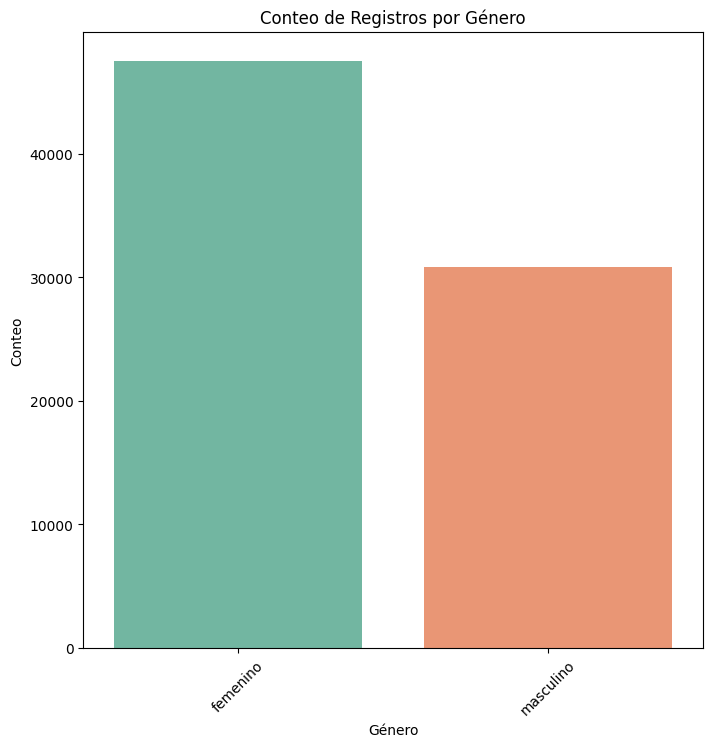

In [253]:
#con el siguiente código validamos que efectivamente el cambio fue aplicado
print(retiros_modelo['GÉNERO'].value_counts())
#Grafica de barras para conocer la proporción por género
plt.figure(figsize=(8, 8))
sns.countplot(data=retiros_modelo, x='GÉNERO', palette='Set2')
plt.title('Conteo de Registros por Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()

Se evidencia una gran proporción de mujeres en la base general, pero es importante revisar como es la proporción entre Activos y retirados

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\3861259474.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = retiros_modelo.groupby(['GÉNERO', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')
C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\3861259474.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totales = conteo.groupby('GÉNERO')['cuenta'].transform('sum')


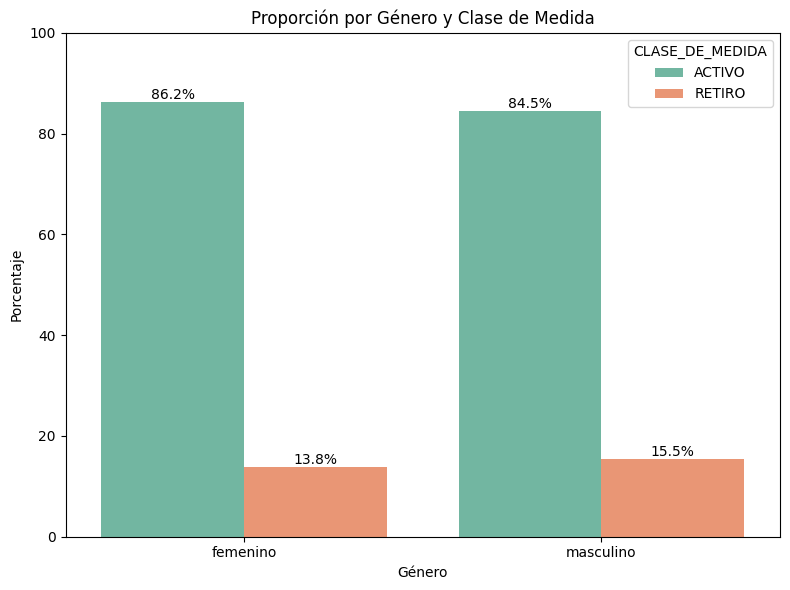

In [254]:
#Se realizar un grafico de genero donde incluyamos la clase de medida

conteo = retiros_modelo.groupby(['GÉNERO', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')

# Calculamos totales por género
totales = conteo.groupby('GÉNERO')['cuenta'].transform('sum')

# Calculamos el porcentaje
conteo['porcentaje'] = conteo['cuenta'] / totales * 100

# Gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=conteo, 
                 x='GÉNERO', 
                 y='porcentaje', 
                 hue='CLASE_DE_MEDIDA', 
                 palette='Set2')

# Etiquetas de porcentaje encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

plt.title('Proporción por Género y Clase de Medida')
plt.ylabel('Porcentaje')
plt.xlabel('Género')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Se evidencia proporción por genero tanto en la clase de Activos como Retiros.

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\4162363480.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = retiros_modelo.groupby(['REGION', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')
C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\4162363480.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orden_regiones = conteo.groupby('REGION')['cuenta'].sum().sort_values(ascending=False).index
C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\4162363480.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

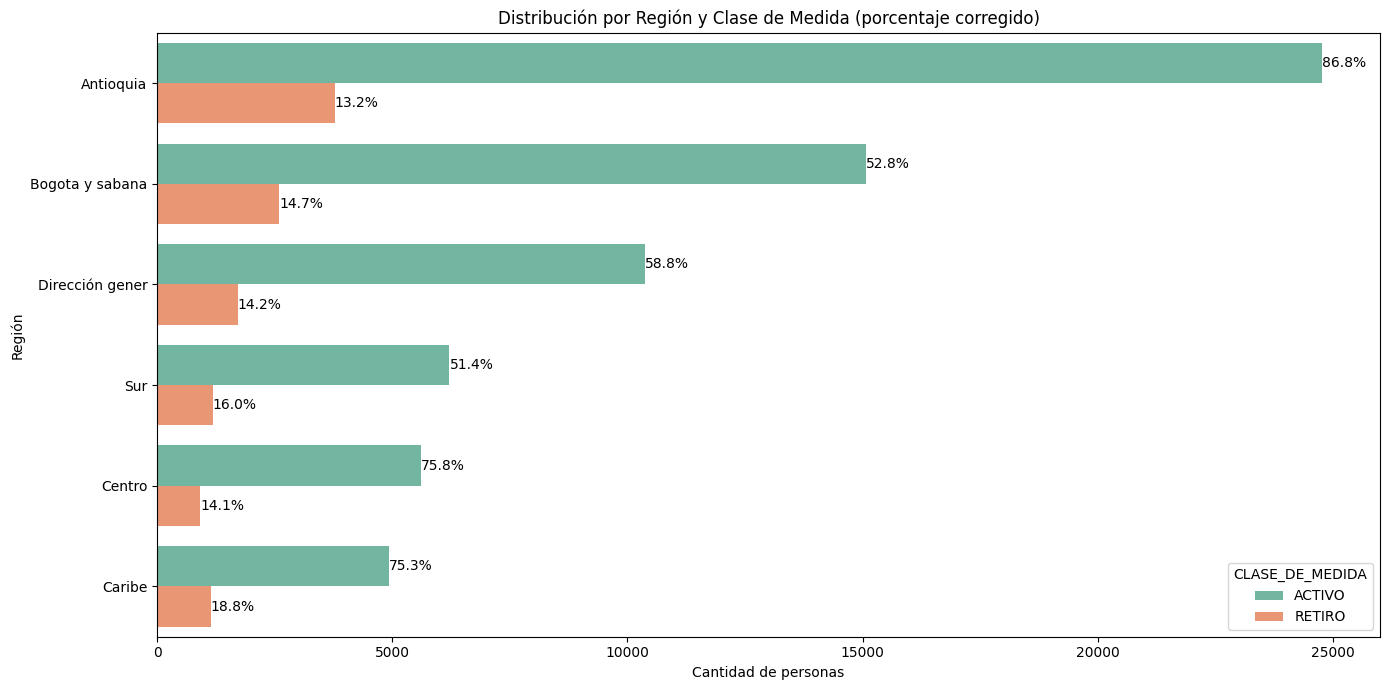

In [255]:
#validamos graficamente la columna región
# Calcular los valores y porcentajes
conteo = retiros_modelo.groupby(['REGION', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')

# Obtener orden de regiones por total general
orden_regiones = conteo.groupby('REGION')['cuenta'].sum().sort_values(ascending=False).index

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=conteo, 
                 y='REGION', 
                 x='cuenta', 
                 hue='CLASE_DE_MEDIDA', 
                 order=orden_regiones,
                 palette='Set2')

# Agregar porcentaje relativo por región
totales_por_region = conteo.groupby('REGION')['cuenta'].sum()

for container in ax.containers:
    for bar in container:
        ancho = bar.get_width()
        region = bar.get_y() + bar.get_height() / 2
        etiqueta = bar.get_y()
        nombre_region = bar.get_label()
        idx = bar.get_y()  # posición en la lista ordenada
        region_name = orden_regiones[int(idx)]
        total_region = totales_por_region[region_name]
        porcentaje = ancho / total_region * 100
        ax.text(ancho + 2, bar.get_y() + bar.get_height()/2, f'{porcentaje:.1f}%', va='center')

# Títulos y formato
plt.title('Distribución por Región y Clase de Medida (porcentaje corregido)')
plt.xlabel('Cantidad de personas')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

In [256]:
#El gráfico el bien interesante y acá se evidencia otro cambio que podemos hacer, es que la región Dirección gener no es una región como tal (es una representación), en ese sentido se puede homologar con la región Antioquia, ya que dirección general son aquellos empleaods que están en Antioquia pero en la parte admministrativa, pero al final con Antioquia
#Reemplazamos los valores de la columna REGION
retiros_modelo['REGION'] = retiros_modelo['REGION'].replace({
    'Dirección General': 'Antioquia',
    'Dirección General (CO)': 'Antioquia',
    'Dirección General (CO) ': 'Antioquia',
    'Dirección General ': 'Antioquia',
    'Dirección gener': 'Antioquia'
})

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1976884766.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  retiros_modelo['REGION'] = retiros_modelo['REGION'].replace({


C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\3951446456.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = retiros_modelo.groupby(['REGION', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')
C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\3951446456.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orden_regiones = conteo.groupby('REGION')['cuenta'].sum().sort_values(ascending=False).index
C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\3951446456.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

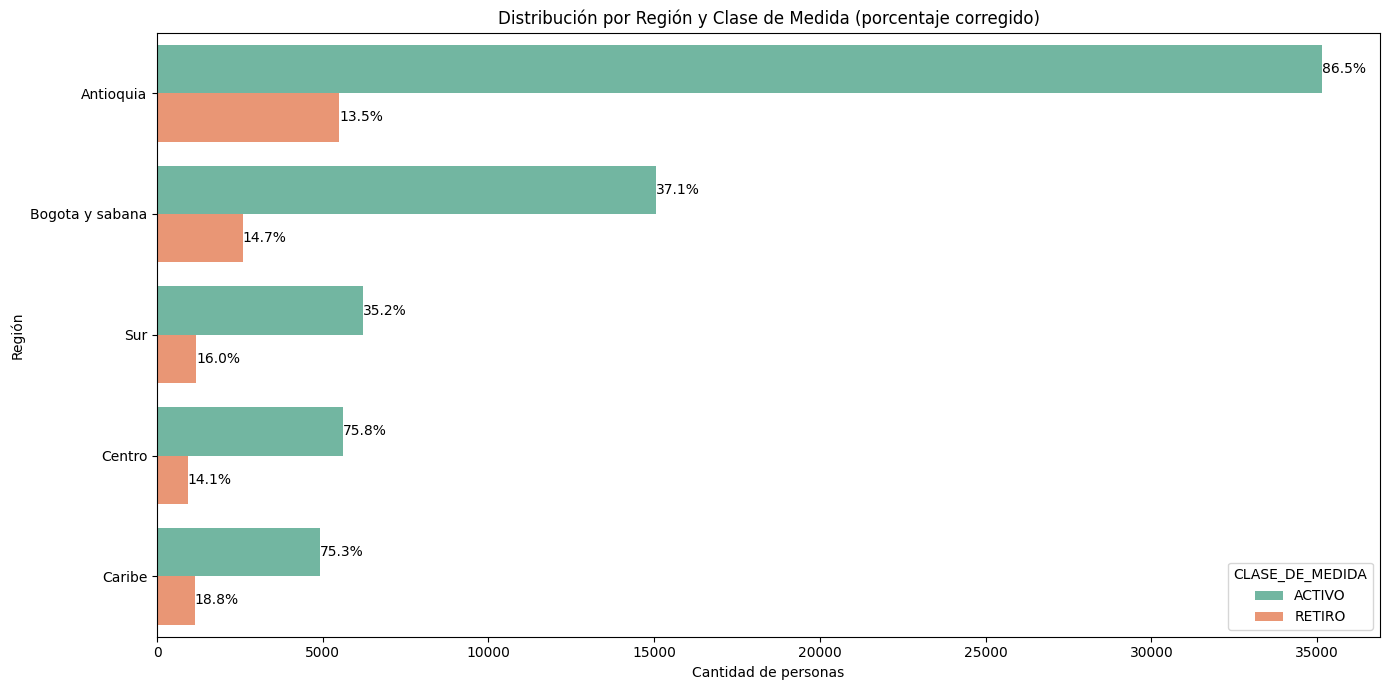

In [257]:
#Se realiza el nuevo el gráfico, después de la homologación

conteo = retiros_modelo.groupby(['REGION', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')

# Obtener orden de regiones por total general
orden_regiones = conteo.groupby('REGION')['cuenta'].sum().sort_values(ascending=False).index

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=conteo, 
                 y='REGION', 
                 x='cuenta', 
                 hue='CLASE_DE_MEDIDA', 
                 order=orden_regiones,
                 palette='Set2')

# Agregar porcentaje relativo por región
totales_por_region = conteo.groupby('REGION')['cuenta'].sum()

for container in ax.containers:
    for bar in container:
        ancho = bar.get_width()
        region = bar.get_y() + bar.get_height() / 2
        etiqueta = bar.get_y()
        nombre_region = bar.get_label()
        idx = bar.get_y()  # posición en la lista ordenada
        region_name = orden_regiones[int(idx)]
        total_region = totales_por_region[region_name]
        porcentaje = ancho / total_region * 100
        ax.text(ancho + 2, bar.get_y() + bar.get_height()/2, f'{porcentaje:.1f}%', va='center')

# Títulos y formato
plt.title('Distribución por Región y Clase de Medida (porcentaje corregido)')
plt.xlabel('Cantidad de personas')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

Se evidencia una gran concentración de activos en la región Antioquia (87%), y se evidencia los retiros de cada uno de las regiones, es un grafico proporcional

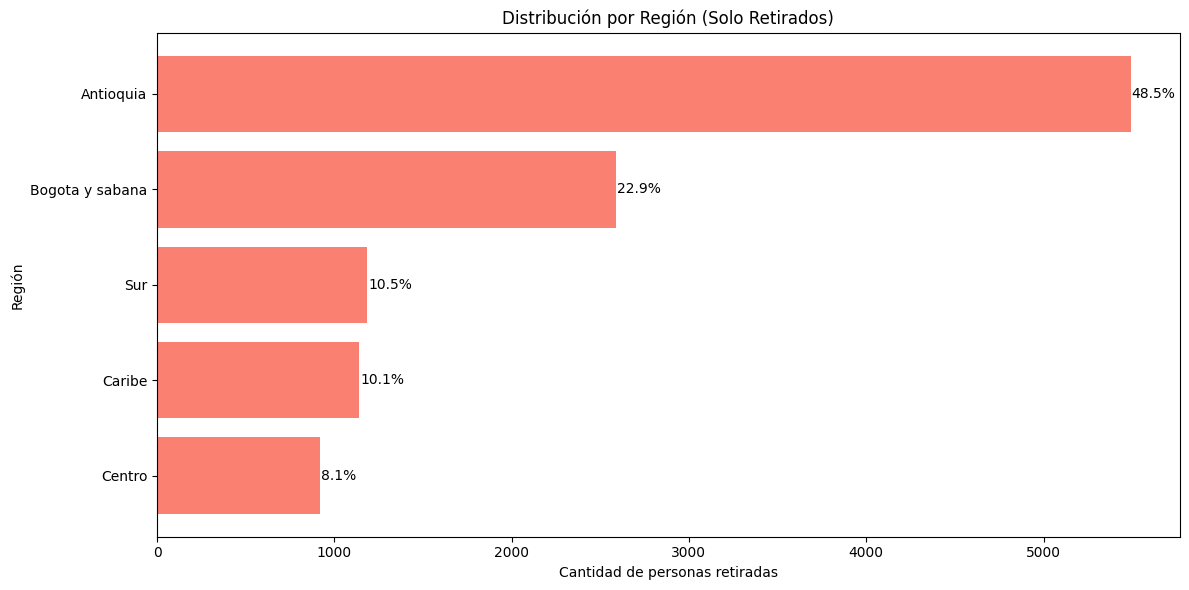

In [258]:
#Ahora, hacemos un grafico de barras horizontales para conocer la distribución por región, pero solo para los retirados
retirados = retiros_modelo[retiros_modelo['CLASE_DE_MEDIDA'] == 'RETIRO']

# Conteo y porcentaje por región
conteo = retirados['REGION'].value_counts()
porcentajes = conteo / conteo.sum() * 100

# Gráfico de barras horizontales
plt.figure(figsize=(12, 6))
bars = plt.barh(conteo.index[::-1], conteo.values[::-1], color='salmon')  # orden de mayor a menor

# Agregar etiquetas de porcentaje
for bar, porcentaje in zip(bars, porcentajes[::-1]):
    plt.text(bar.get_width() + 5, 
             bar.get_y() + bar.get_height() / 2, 
             f'{porcentaje:.1f}%', 
             va='center')

# Títulos y etiquetas
plt.title('Distribución por Región (Solo Retirados)')
plt.xlabel('Cantidad de personas retiradas')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

En el gráfico anterior, se evidencia la distribución de los retiros por región, es más fácil hacer lectura de este grafico.

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\56527121.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = retiros_modelo.groupby(['FORMA_DE_TRABAJO', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')
C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\56527121.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orden_forma_trabajo = conteo.groupby('FORMA_DE_TRABAJO')['cuenta'].sum().sort_values(ascending=False).index


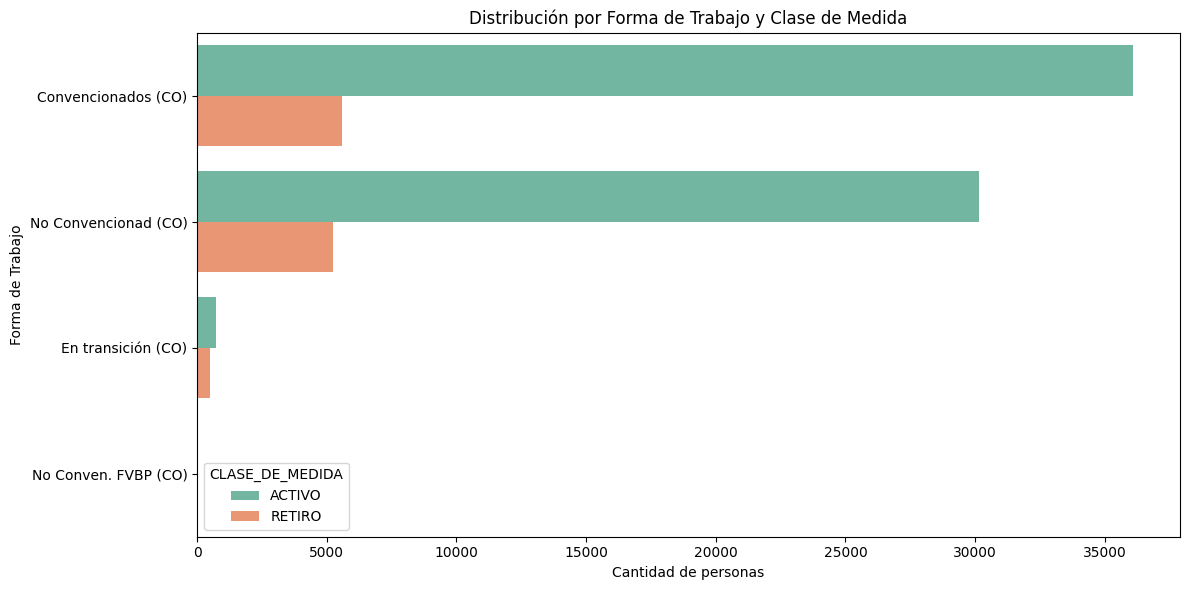

In [259]:
#Conocer graficamente la distribución por forma de trabajo y clase de medida

conteo = retiros_modelo.groupby(['FORMA_DE_TRABAJO', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')

# Ordenamos las formas de trabajo por total
orden_forma_trabajo = conteo.groupby('FORMA_DE_TRABAJO')['cuenta'].sum().sort_values(ascending=False).index

# Creamos el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=conteo, 
                 y='FORMA_DE_TRABAJO', 
                 x='cuenta', 
                 hue='CLASE_DE_MEDIDA', 
                 order=orden_forma_trabajo,
                 palette='Set2')

# Títulos y formato
plt.title('Distribución por Forma de Trabajo y Clase de Medida')
plt.xlabel('Cantidad de personas')
plt.ylabel('Forma de Trabajo')
plt.tight_layout()

Está grafica puede generar valor porque el campo FORMA_DE_TRABAJO refleha los beneficios que puede tener un empleado, además al ser convencionado puede tener un rol operativo y se puede asociar a un volumen más alto en retiro, esta columna se puede volver categoría, y para eso necesita algunas transformación, ejemplo: No convencionad (CO),  No Conven. FVBP (C0) y En transición (CO) se pueden considerar no_convencionado, el resto se puede clasificar como convencionado

In [260]:
#Hacemos una trasnformación en el campo de forma de trabajo, para que sea más entendible
#Reemplazamos los valores de la columna FORMA_DE_TRABAJO
retiros_modelo['FORMA_DE_TRABAJO'] = retiros_modelo['FORMA_DE_TRABAJO'].replace({
    'Convencionados (CO)': 'convencionado',
    'No Convencionad (CO)': 'no_convencionado',
    'En transición (CO)': 'no_convencionado',
    'No Conven. FVBP (CO)': 'no_convencionado'
})

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\2937608387.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  retiros_modelo['FORMA_DE_TRABAJO'] = retiros_modelo['FORMA_DE_TRABAJO'].replace({


C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1392540884.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = retiros_modelo.groupby(['FORMA_DE_TRABAJO', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')
C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\1392540884.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orden_forma_trabajo = conteo.groupby('FORMA_DE_TRABAJO')['cuenta'].sum().sort_values(ascending=False).index


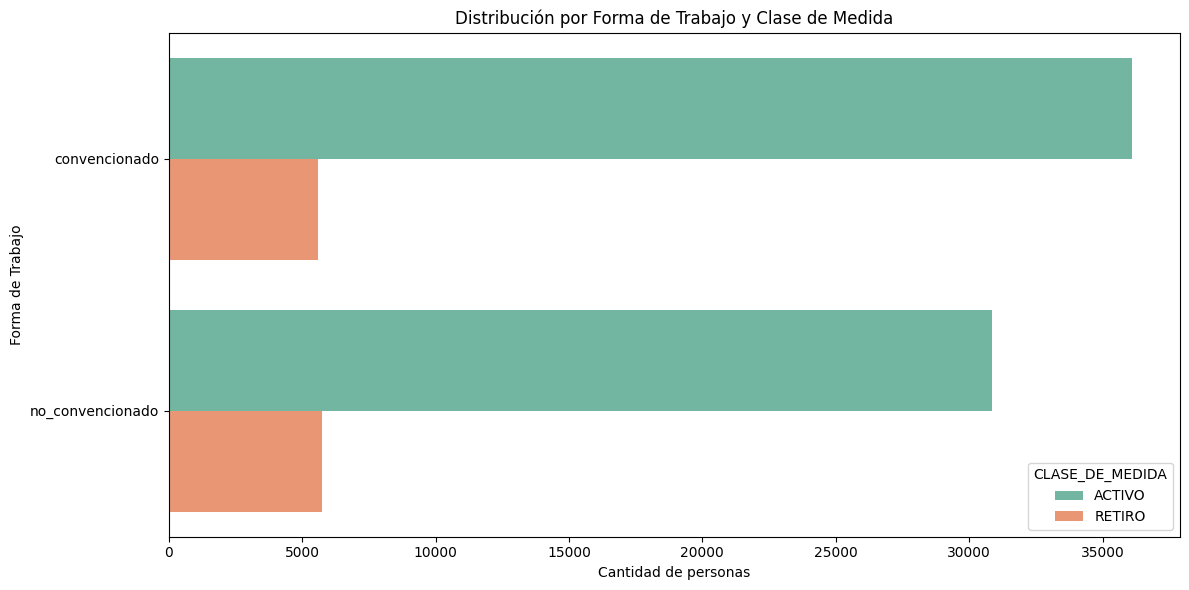

In [261]:
# con el cambio anterior, realizamos de nuevo la grafica para Conocer graficamente la distribución por forma de trabajo y clase de medida

conteo = retiros_modelo.groupby(['FORMA_DE_TRABAJO', 'CLASE_DE_MEDIDA']).size().reset_index(name='cuenta')

# Ordenamos las formas de trabajo por total
orden_forma_trabajo = conteo.groupby('FORMA_DE_TRABAJO')['cuenta'].sum().sort_values(ascending=False).index

# Creamos el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=conteo, 
                 y='FORMA_DE_TRABAJO', 
                 x='cuenta', 
                 hue='CLASE_DE_MEDIDA', 
                 order=orden_forma_trabajo,
                 palette='Set2')

# Títulos y formato
plt.title('Distribución por Forma de Trabajo y Clase de Medida')
plt.xlabel('Cantidad de personas')
plt.ylabel('Forma de Trabajo')
plt.tight_layout()

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\716740984.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



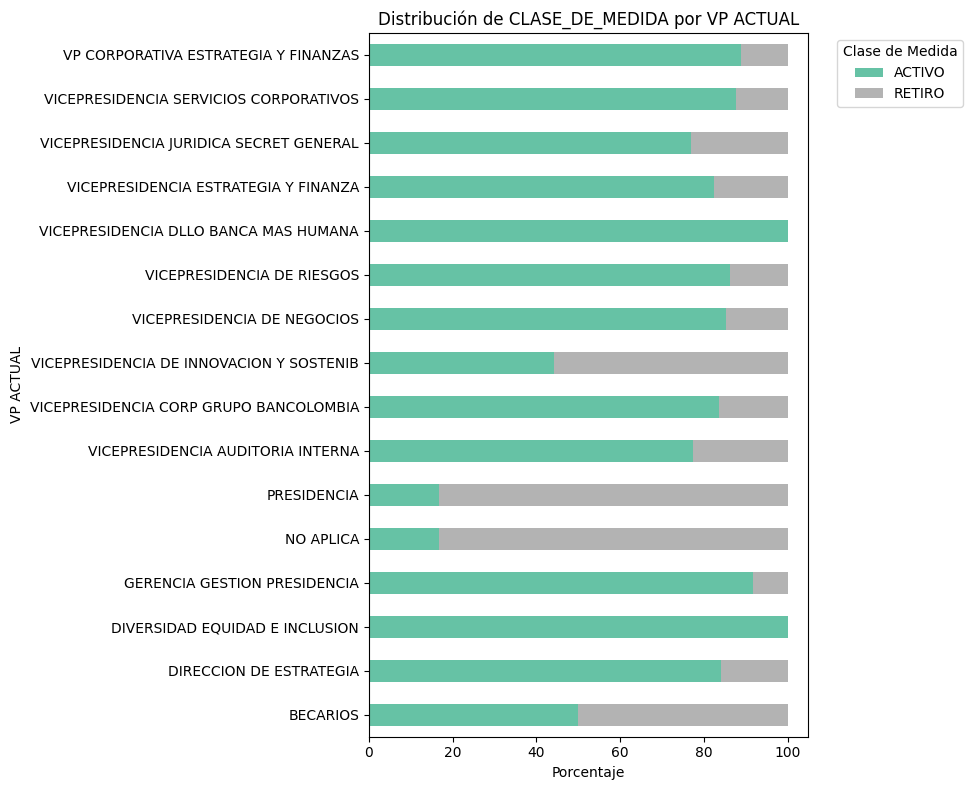

In [309]:
#Analicemos las vicepresidencias donde trabajan los empleados, para conocer la distribución por cada una de ellas
conteo = retiros_modelo.groupby(['VP ACTUAL', 'CLASE_DE_MEDIDA']).size().unstack(fill_value=0)

# Calculamos los porcentajes
porcentajes = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Gráfico
porcentajes.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='Set2')

plt.xlabel('Porcentaje')
plt.ylabel('VP ACTUAL')
plt.title('Distribución de CLASE_DE_MEDIDA por VP ACTUAL')
plt.legend(title='Clase de Medida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\jforero\AppData\Local\Temp\ipykernel_35164\2774104702.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



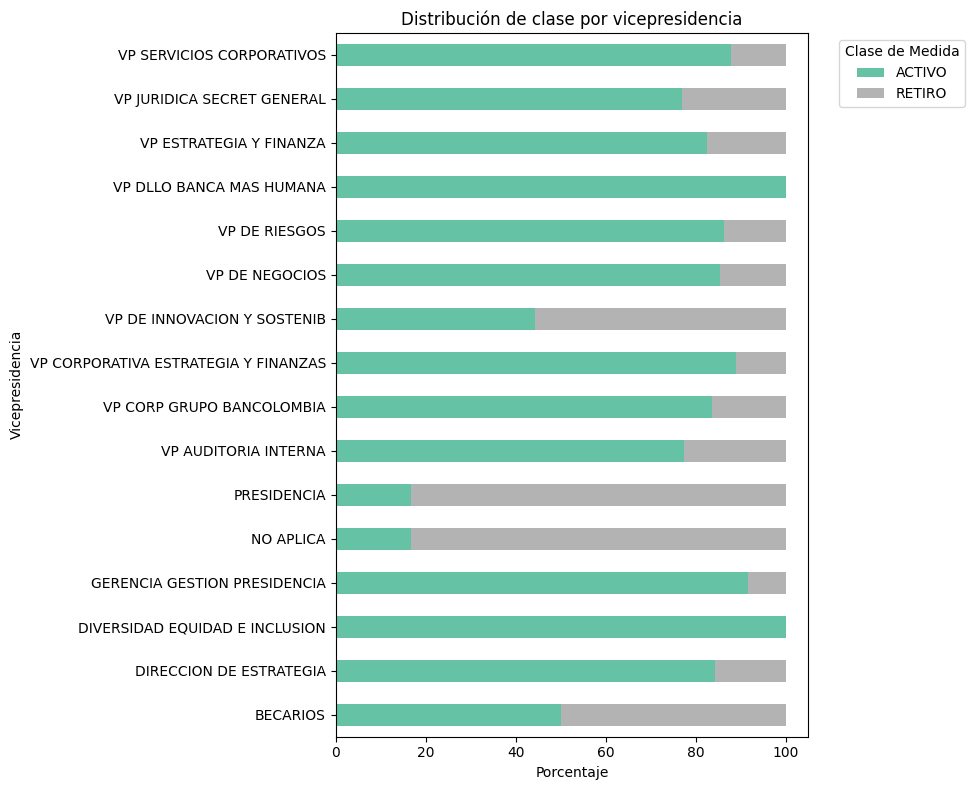

In [312]:
#Con la intención de hacer mejor la experiencia del usuario, cambiaremos la palabra VICEPRESIDENCIA POR VP
retiros_modelo['VP ACTUAL'] = retiros_modelo['VP ACTUAL'].str.replace('VICEPRESIDENCIA', 'VP', case=False)
#Hacemos la grafica nuevamente

conteo = retiros_modelo.groupby(['VP ACTUAL', 'CLASE_DE_MEDIDA']).size().unstack(fill_value=0)

# Calculamos los porcentajes
porcentajes = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Gráfico
porcentajes.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='Set2')

plt.xlabel('Porcentaje')
plt.ylabel('Vicepresidencia')
plt.title('Distribución de clase por vicepresidencia')
plt.legend(title='Clase de Medida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [262]:
#Se realiza de nuevo el grafico con el cambio

 #Validamos con el siguiente código, todos los valores únicos, permitiendo visualizar si tenemos valores nulos, caracteres especiales en todas las columnas a la vez
output = []
for col in retiros.columns:
    vc = retiros[col].value_counts(dropna=False).sort_index()
    total = vc.sum()
    output.append(f"{col}:\n{vc}\nTotal: {total}")
print('\n\n'.join(output))                                             

ID_EMPLEADOS:
ID_EMPLEADOS
12          1
30          1
34          1
41          1
42          1
           ..
90062236    1
90062248    1
90062257    1
90062315    1
92000929    1
Name: count, Length: 38566, dtype: int64
Total: 83142

COMPAÑÍA:
COMPAÑÍA
Banca de Inv. Bancolombia      390
Bancolombia S.A.             78771
Factoring Bancolombia S.A       24
Fiduciaria Bancolombia        2132
Leasing Bancolombia S.A.       454
Valores Bancolombia S.A.      1371
Name: count, dtype: int64
Total: 83142

CODIGO_AREA:
CODIGO_AREA
0           11
3            7
4           25
6            6
14           7
            ..
70006498     1
70006499     1
70006500     1
70006501     1
70006507     1
Name: count, Length: 4593, dtype: int64
Total: 83142

AREA:
AREA
 GCIA MERCADEO DE CANALES                    5
 GERENCIA COMERCIAL DE INCLUSION             1
 GERENCIA ESTRATEGIA CCIAL DE INCLUSION      1
 GERENCIA MERCADEO PERSONAS                  2
ADC ADMIN DE IDENTIDADES Y ACCESOS           4
     

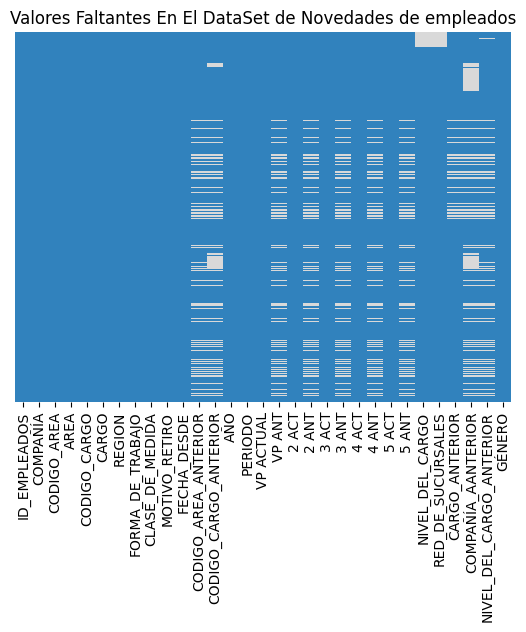

In [263]:
#Identificar datos faltantes de los features del dataset

sns.heatmap(retiros.isnull(), yticklabels=False, cbar=False, cmap='tab20c')
plt.title('Valores Faltantes En El DataSet de Novedades de empleados')
plt.show()


# **VALORES NULOS, CARACTERES ESPECIALES Y EN BLANCO**

Se revisa y se identifica que las siguientes columnas no presentan carácteres especiales, ni en blancos, más sin embargo, se identifican algunos valores nulos. Para este ejercicio determinamos que las columnas con un porcentaje de valores nulos mayor al 30% será eliminado.  veamos:
1. Area= 11
2. Còdigo de area= 2
3. Còdigo de cargo= 22579***20%
4. VP actual= 12
5. Vp Ant= 18543***17%
6. 2 act= 12
7. 2 ant= 18543***17%
8. 3 act= 12
9. 3 ant= 18543***17%
10. 4 act= 12
11. 4 ant= 18543***17%
12. 5 act= 12
13. 5 ant= 18543***17%
14. Nivel de cargo= 3387***3%
15. red de sucursales= 3387***3%
16. Cargo anterior= 7201***7%
17. Compañia anterior= 27928***26%
18. Nivel de cargo anterior= 18769***17%


Se analizan cada una de las columnas y se determina que no se presentan valores en blanco, ni carácteres especiales. Más sin embargo, se identifican algunos valores nulos que representan menos del 30%, por lo que por este motivo no será eliminadas.


# **LIMPIEZA**

# VARIABLE GENERO
Se identifica que la columna: "Género presenta inconsistencia en sus datos, se escribe de diferentes formas, por lo que se procede a limpiar la columna a continuación.

In [264]:
retiros['GÉNERO'] = retiros['GÉNERO'].str.strip().str.lower()   #.str.strip() Este método elimina los espacios en blanco al inicio y al final de cada valor de texto en la columna.

                                                                #.str.lower() Después de quitar espacios, este método convierte todo el texto a minúsculas.
retiros['GÉNERO'] = retiros['GÉNERO'].replace({
    'femenino': 'Femenino',
    'feménino': 'Femenino',
    'masculino': 'Masculino',
    'masculíno': 'Masculino',
})


print(retiros['GÉNERO'].unique())

['Masculino' 'Femenino']


# VARIABLE NIVEL DE CARGO
Se identifica que la columna: "Nivel de cargo" presenta inconsistencia en sus datos, se escribe de diferentes formas, por lo que se procede a limpiar la columna a continuación.

In [265]:
retiros['NIVEL_DEL_CARGO'] = retiros['NIVEL_DEL_CARGO'].replace('PROFESIONALES', 'PROFESIONAL')


In [266]:
retiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83142 entries, 0 to 83141
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPLEADOS              83142 non-null  int64  
 1   COMPAÑÍA                  83142 non-null  object 
 2   CODIGO_AREA               83142 non-null  int64  
 3   AREA                      83131 non-null  object 
 4   CODIGO_CARGO              83142 non-null  int64  
 5   CARGO                     83142 non-null  object 
 6   REGION                    83142 non-null  object 
 7   FORMA_DE_TRABAJO          83142 non-null  object 
 8   CLASE_DE_MEDIDA           83142 non-null  object 
 9   MOTIVO_RETIRO             83142 non-null  object 
 10  FECHA_DESDE               83142 non-null  object 
 11  CODIGO_AREA_ANTERIOR      70055 non-null  float64
 12  CODIGO_CARGO_ANTERIOR     66875 non-null  float64
 13  AÑO                       83142 non-null  int64  
 14  PERIOD

Se revisa el tipo de datos de las columnas a trabajar en el modelo y se identifica que todas presentan el formato correcto; más sin embargo, se identifica que la variable año, es pertienente convertirla a categorica, ya que con este dato no se pueden sacar estadisticas. Y, la columna: periodo se debe convertir a: DATATIME, ya que es una fecha, además se identifica la necesidad de crear una nueva columna, para la variable a predecir, en este caso: "Retiros voluntarios"

# **CREAR COLUMNA PARA RETIROS VOLUNTARIOS Y RETIROS VOLUNTARIOS POR ARREGLO MUTUO"**

Vamos  a clasificar la variable a predecir como "RETIRO VOLUNTARIO" en donde sus valores van a ser:

1 --> Verdadero: El empleado se retiro voluntariamente (en este valor van a estar relacionados de la variable MOTIVO  DE RETIRO, los valores de "RETIRO VOLUNTARIO" y "VOLUNTARIO ARREGLO MUTUO"

0 --> Falso: El empelado se retiro de su cargo por cualquier otro motivo  los cuales estan relacionados en la variable MOTIVO  DE RETIRO ≠ "RETIRO VOLUNTARIO" y "VOLUNTARIO ARREGLO MUTUO"

In [267]:
retiros['RETIRO_VOLUNTARIO'] = np.where(
    retiros['MOTIVO_RETIRO'].isin(['RETIRO VOLUNTARIO', 'VOLUNTARIO ARREGLO MUTUO']),
    1,
    0
)

In [268]:
print(retiros['RETIRO_VOLUNTARIO'].value_counts().sort_index())
print("Suma total frecuencia:", retiros['RETIRO_VOLUNTARIO'].value_counts(dropna=False).sum())

RETIRO_VOLUNTARIO
0    83142
Name: count, dtype: int64
Suma total frecuencia: 83142


In [269]:
retiros.sample(2)

ID_EMPLEADOS          COMPAÑÍA  CODIGO_AREA  \
33724         28987  Bancolombia S.A.         1186   
46913         53279  Bancolombia S.A.          371   

                                        AREA  CODIGO_CARGO  \
33724         SERVICIO SUC BOGOTA INDUSTRIAL          5870   
46913  CENTRO DE SERV PARA PERS Y PYMES CALI      70083882   

                         CARGO           REGION     FORMA_DE_TRABAJO  \
33724         SUPERNUMERARIO/A  Bogota y sabana  Convencionados (CO)   
46913  AUXILIAR DEPARTAMENTO I              Sur  Convencionados (CO)   

      CLASE_DE_MEDIDA MOTIVO_RETIRO FECHA_DESDE  CODIGO_AREA_ANTERIOR  \
33724          ACTIVO     PROMOCIÓN  13/12/2022                1186.0   
46913          ACTIVO  CONTRATACIÓN  19/07/2021                   NaN   

       CODIGO_CARGO_ANTERIOR   AÑO PERIODO  \
33724                60786.0  2022  dic-22   
46913                    NaN  2021  jul-21   

                                    VP ACTUAL                       VP ANT  \
33724             VICEPRESIDENCIA DE NEGOCIOS  VICEPRESIDENCIA DE NEGOCIOS   
46913  VICEPRESIDENCIA SERVICIOS CORPORATIVOS                          NaN   

                                         2 ACT  \
33724  VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP   
46913   VICEPRESIDENCIA SERV PARA LOS CLIENTES   

                                         2 ANT  \
33724  VICEPRESIDENCIA NEGOCIOS PERSN PYME EMP   
46913                                      NaN   

                                        3 ACT  \
33724  VICEPRESIDENCIA PERSONAS Y PYME BOGOTA   
46913          DIRECCION SERVICIOS DE CANALES   

                                        3 ANT  \
33724  VICEPRESIDENCIA PERSONAS Y PYME BOGOTA   
46913                                     NaN   

                                          4 ACT  \
33724        GCIA SERVICIO EN SUCURSALES BOGOTA   
46913  GCIA SERVICIOS REGIONALES ESPECIALIZADOS   

                                    4 ANT  \
33724  GCIA SERVICIO EN SUCURSALES BOGOTA   
46913                                 NaN   

                                          5 ACT  \
33724            SERVICIO SUC BOGOTA INDUSTRIAL   
46913  SECCION SERV ESPECIALIZADOS INMOBILIARIO   

                                5 ANT NIVEL_DEL_CARGO  \
33724  SERVICIO SUC BOGOTA INDUSTRIAL       OPERATIVO   
46913                             NaN       OPERATIVO   

                 RED_DE_SUCURSALES                        CARGO_ANTERIOR  \
33724            RED DE SUCURSALES  ASESOR/A DE SERVICIOS SUPERNUMERARIO   
46913  GRUPO SIN RED DE SUCURSALES               AUXILIAR DEPARTAMENTO I   

      COMPAÑÍA_AANTERIOR NIVEL_DEL_CARGO_ANTERIOR     GÉNERO  \
33724   Bancolombia S.A.                OPERATIVO  Masculino   
46913                NaN                      NaN  Masculino   

       RETIRO_VOLUNTARIO  
33724                  0  
46913                  0

In [270]:
retiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83142 entries, 0 to 83141
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPLEADOS              83142 non-null  int64  
 1   COMPAÑÍA                  83142 non-null  object 
 2   CODIGO_AREA               83142 non-null  int64  
 3   AREA                      83131 non-null  object 
 4   CODIGO_CARGO              83142 non-null  int64  
 5   CARGO                     83142 non-null  object 
 6   REGION                    83142 non-null  object 
 7   FORMA_DE_TRABAJO          83142 non-null  object 
 8   CLASE_DE_MEDIDA           83142 non-null  object 
 9   MOTIVO_RETIRO             83142 non-null  object 
 10  FECHA_DESDE               83142 non-null  object 
 11  CODIGO_AREA_ANTERIOR      70055 non-null  float64
 12  CODIGO_CARGO_ANTERIOR     66875 non-null  float64
 13  AÑO                       83142 non-null  int64  
 14  PERIOD

# ESTADISTICA DESCRIPTIVA

In [271]:
variables_modelo = [
    "COMPAÑÍA", "CODIGO_AREA", "AREA", "CODIGO_CARGO", "CARGO", "REGION",
    "FORMA_DE_TRABAJO", "AÑO", "PERIODO", "GÉNERO", "RETIRO_VOLUNTARIO", "NIVEL_DEL_CARGO","RED_DE_SUCURSALES"
]

In [272]:
retiros_reducido = retiros[variables_modelo].copy()

Convertimos 'RETIRO_VOLUNTARIO' como BOOLEANA para poderlo representar mejor en un diagrama de barras

In [273]:
retiros['RETIRO_VOLUNTARIO'] = retiros['RETIRO_VOLUNTARIO'].astype("bool")

In [274]:
import plotly.express as px

# Reemplazar True/False por "Sí"/"No"
conteo = retiros_reducido['RETIRO_VOLUNTARIO'].replace({True: "Sí", False: "No"}).value_counts().reset_index()
conteo.columns = ['RETIRO_VOLUNTARIO', 'count']

# Crear gráfico de barras con etiquetas visibles
fig = px.bar(
    conteo,
    x='RETIRO_VOLUNTARIO',
    y='count',
    text='count',
    labels={'RETIRO_VOLUNTARIO': '¿Se retiró voluntariamente?', 'count': 'Cantidad'},
    title='Retiros voluntarios en Bancolombia',
    width=600,
    height=500  # Aumenta altura para dar más espacio
)

# Posición y estilo del texto
fig.update_traces(
    textposition='outside',
    textfont_size=14  # Tamaño más grande para mejor lectura
)

# Ajustar márgenes y diseño
fig.update_layout(
    margin=dict(t=100),  # Espacio superior extra
    yaxis_title='Cantidad',
    xaxis_title='¿Se retiró voluntariamente?',
    uniformtext_minsize=8,
    uniformtext_mode='show'
)

fig.show()

In [275]:
import plotly.express as px

# Paso 1: Top 20 códigos de área
top_areas = retiros['CODIGO_AREA'].value_counts().head(20).index

# Paso 2: Filtrar los datos
df_top = retiros[retiros['CODIGO_AREA'].isin(top_areas)]

# Paso 3: Agrupar por código de área y retiro voluntario
grouped = df_top.groupby(['CODIGO_AREA', 'RETIRO_VOLUNTARIO'], observed=True).size().reset_index(name='Cantidad')

# Paso 4: Convertir booleanos a texto
grouped['RETIRO_VOLUNTARIO'] = grouped['RETIRO_VOLUNTARIO'].map({False: 'No', True: 'Sí'})

# Paso 5: Asegurar que el código de área sea string
grouped['CODIGO_AREA'] = grouped['CODIGO_AREA'].astype(str)

# Paso 6: Crear el gráfico
fig = px.bar(
    grouped,
    x='CODIGO_AREA',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Top 20 Códigos de Área vs Retiro Voluntario',
    labels={
        'CODIGO_AREA': 'Código de Área',
        'Cantidad': 'Número de Retiros',
        'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'
    },
    barmode='stack'
)

# Paso 7: Ajustar el ángulo de las etiquetas
fig.update_layout(xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()


In [276]:
import plotly.express as px

# Paso 1: Top 20 áreas por cantidad de retiros
top_areas = retiros_reducido['AREA'].value_counts().head(20).index

# Paso 2: Filtrar el DataFrame por las top 20 áreas
df_top = retiros_reducido[retiros_reducido['AREA'].isin(top_areas)]

# Paso 3: Agrupar por AREA y RETIRO_VOLUNTARIO
grouped = df_top.groupby(['AREA', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 4: Asegurar que AREA esté como string (por si acaso)
grouped['AREA'] = grouped['AREA'].astype(str)

# Paso 5: Crear el gráfico apilado
fig = px.bar(
    grouped,
    x='AREA',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Top 20 Áreas vs Retiro Voluntario',
    labels={
        'AREA': 'Área',
        'Cantidad': 'Número de Retiros',
        'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'
    },
    barmode='stack'  # Apilado
)

# Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    width=1500,  # Ancho del gráfico
    height=800   # Alto del gráfico
)

fig.show()


In [277]:
import plotly.express as px

# Paso 1: Top 20 códigos de cargo
top_cargos = retiros_reducido['CODIGO_CARGO'].value_counts().head(20).index

# Paso 2: Filtrar el DataFrame por los top 20 códigos de cargo
df_top = retiros_reducido[retiros_reducido['CODIGO_CARGO'].isin(top_cargos)]

# Paso 3: Agrupar por código de cargo y retiro voluntario
grouped = df_top.groupby(['CODIGO_CARGO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 4: Asegurar que CODIGO_CARGO esté como string para que sea categórico en el eje X
grouped['CODIGO_CARGO'] = grouped['CODIGO_CARGO'].astype(str)

# Paso 5: Crear el gráfico apilado
fig = px.bar(
    grouped,
    x='CODIGO_CARGO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Top 20 Códigos de Cargo vs Retiro Voluntario',
    labels={'CODIGO_CARGO': 'Código de Cargo', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack'  # Apilado
)

# Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    width=1500,  # Ancho del gráfico
    height=800   # Alto del gráfico
)

fig.show()

In [278]:
# Mostrar la tabla con el top 20 de códigos de cargo y retiro voluntario
tabla_top20 = grouped.sort_values(by='Cantidad', ascending=False)
display(tabla_top20.sort_index())


CODIGO_CARGO  RETIRO_VOLUNTARIO  Cantidad
0         24834                  0        15
1         25366                  0        34
2         47121                  0        18
3         63466                  0        14
4         63470                  0        13
5         64149                  0        14
6         71160                  0        24
7         74306                  0        14
8         74803                  0        17
9         74956                  0        14
10        76283                  0        13
11        77182                  0        20
12        86420                  0        14
13        86540                  0        13
14        86732                  0        13
15        86733                  0        14
16        88025                  0        28
17        88027                  0        22
18        88942                  0        13
19     99999999                  0     16175

In [279]:
import plotly.express as px

# Paso 1: Top 20 cargos por cantidad de retiros
top_cargos = retiros_reducido['CARGO'].value_counts().head(20).index

# Paso 2: Filtrar el DataFrame por los top 20 cargos
df_top = retiros_reducido[retiros_reducido['CARGO'].isin(top_cargos)]

# Paso 3: Agrupar por CARGO y RETIRO_VOLUNTARIO
grouped = df_top.groupby(['CARGO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 4: Asegurar que CARGO esté como string para que sea categórico en el eje X
grouped['CARGO'] = grouped['CARGO'].astype(str)

# Paso 5: Crear el gráfico apilado
fig = px.bar(
    grouped,
    x='CARGO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Top 20 Cargos vs Retiro Voluntario',
    labels={'CARGO': 'Cargo', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack'  # Apilado
)

# Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    width=1500,  # Ancho
    height=800   # Alto
)

fig.show()

In [280]:
import pandas as pd
import plotly.express as px
import numpy as np

# Paso 1: Reemplazar los nombres de los meses con su formato en inglés
month_translation = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Asegurarse de que los valores de la columna 'PERIODO' estén en minúsculas
retiros_reducido['PERIODO'] = retiros_reducido['PERIODO'].str.lower()

# Reemplazar los meses con su formato en inglés
retiros_reducido['PERIODO'] = retiros_reducido['PERIODO'].replace(month_translation, regex=True)

# Paso 2: Convertir la columna PERIODO a formato datetime (ahora con meses en inglés)
retiros_reducido['PERIODO'] = pd.to_datetime(retiros_reducido['PERIODO'], format='%b-%y', errors='coerce')

# Paso 3: Verificar si hay valores nulos después de la conversión
print(retiros_reducido[retiros_reducido['PERIODO'].isna()])

# Paso 4: Calcular el número de bins según la regla de Freedman-Diaconis
Q1 = retiros_reducido['PERIODO'].quantile(0.25)
Q3 = retiros_reducido['PERIODO'].quantile(0.75)
IQR = Q3 - Q1
bin_width = 2 * IQR / (len(retiros_reducido['PERIODO']) ** (1 / 3))
bins = int((retiros_reducido['PERIODO'].max() - retiros_reducido['PERIODO'].min()) / bin_width)

# Paso 5: Crear el gráfico apilado con la variable RETIRO_VOLUNTARIO
fig = px.histogram(
    retiros_reducido,
    x='PERIODO',
    color='RETIRO_VOLUNTARIO',  # Apilar según RETIRO_VOLUNTARIO
    nbins=bins,  # Número de bins calculado
    title='Histograma de Frecuencia de Periodo por Retiro Voluntario',
    labels={'PERIODO': 'Periodo', 'count': 'Frecuencia'},
    barmode='stack',  # Apilado
    color_discrete_map={  # Asignar colores específicos
        False: 'blue',    # Falso será azul
        True: 'orange'    # Verdadero será naranja
    }
)

# Paso 6: Agregar contornos a las barras y modificar el tamaño del gráfico
fig.update_traces(marker_line_width=2, marker_line_color='black')  # Contornos de las barras en negro

# Paso 7: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,  # Cambiar el ancho según desees
    height=600   # Cambiar la altura según desees
)

# Mostrar el gráfico
fig.show()

Empty DataFrame
Columns: [COMPAÑÍA, CODIGO_AREA, AREA, CODIGO_CARGO, CARGO, REGION, FORMA_DE_TRABAJO, AÑO, PERIODO, GÉNERO, RETIRO_VOLUNTARIO, NIVEL_DEL_CARGO, RED_DE_SUCURSALES]
Index: []


In [281]:
import pandas as pd
import plotly.express as px

# Paso 1: Agrupar por la variable COMPAÑÍA y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['COMPAÑÍA', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 2: Asegurarse de que la columna COMPAÑÍA esté como string (si es necesario)
grouped['COMPAÑÍA'] = grouped['COMPAÑÍA'].astype(str)

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='COMPAÑÍA',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Compañía y Retiro Voluntario',
    labels={'COMPAÑÍA': 'Compañía', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1600,  # Ancho del gráfico
    height=900   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()


In [282]:
import pandas as pd
import plotly.express as px

# Paso 1: Agrupar por la variable REGION y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['REGION', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 2: Asegurarse de que la columna REGION esté como string (si es necesario)
grouped['REGION'] = grouped['REGION'].astype(str)

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='REGION',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Región y Retiro Voluntario',
    labels={'REGION': 'Región', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()


Pasos para un Feature Engineering

In [283]:
import pandas as pd
import plotly.express as px

# Paso 1: Agrupar por la variable FORMA_DE_TRABAJO y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['FORMA_DE_TRABAJO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 2: Asegurarse de que la columna FORMA_DE_TRABAJO esté como string (si es necesario)
grouped['FORMA_DE_TRABAJO'] = grouped['FORMA_DE_TRABAJO'].astype(str)

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='FORMA_DE_TRABAJO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Forma de Trabajo y Retiro Voluntario',
    labels={'FORMA_DE_TRABAJO': 'Forma de Trabajo', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()


In [284]:
import pandas as pd
import plotly.express as px

# Paso 1: Asegurarse de que la columna AÑO sea de tipo string (si es necesario)
retiros_reducido['AÑO'] = retiros_reducido['AÑO'].astype(str)

# Paso 2: Agrupar por la variable AÑO y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['AÑO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='AÑO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Año y Retiro Voluntario',
    labels={'AÑO': 'Año', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()

In [285]:
import pandas as pd
import plotly.express as px

# Paso 1: Asegurarse de que la columna GÉNERO sea de tipo string (si es necesario)
retiros_reducido['GÉNERO'] = retiros_reducido['GÉNERO'].astype(str)

# Paso 2: Agrupar por la variable GÉNERO y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['GÉNERO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='GÉNERO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Género y Retiro Voluntario',
    labels={'GÉNERO': 'Género', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()

In [286]:
import pandas as pd
import plotly.express as px

# Paso 1: Asegurarse de que la columna NIVEL_DEL_CARGO sea de tipo string (si es necesario)
retiros_reducido['NIVEL_DEL_CARGO'] = retiros_reducido['NIVEL_DEL_CARGO'].astype(str)

# Paso 2: Agrupar por la variable NIVEL_DEL_CARGO y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['NIVEL_DEL_CARGO', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='NIVEL_DEL_CARGO',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Nivel del Cargo y Retiro Voluntario',
    labels={'NIVEL_DEL_CARGO': 'Nivel del Cargo', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()

In [287]:
import pandas as pd
import plotly.express as px

# Paso 1: Asegurarse de que la columna RED_DE_SUCURSALES sea de tipo string (si es necesario)
retiros_reducido['RED_DE_SUCURSALES'] = retiros_reducido['RED_DE_SUCURSALES'].astype(str)

# Paso 2: Agrupar por la variable RED_DE_SUCURSALES y RETIRO_VOLUNTARIO
grouped = retiros_reducido.groupby(['RED_DE_SUCURSALES', 'RETIRO_VOLUNTARIO']).size().reset_index(name='Cantidad')

# Paso 3: Crear el gráfico de barras apiladas
fig = px.bar(
    grouped,
    x='RED_DE_SUCURSALES',
    y='Cantidad',
    color='RETIRO_VOLUNTARIO',
    title='Cantidad de Retiros por Red de Sucursales y Retiro Voluntario',
    labels={'RED_DE_SUCURSALES': 'Red de Sucursales', 'Cantidad': 'Número de Retiros', 'RETIRO_VOLUNTARIO': '¿Retiro Voluntario?'},
    barmode='stack',  # Apilado
)

# Paso 4: Modificar el tamaño del gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Rotar las etiquetas del eje X
    width=1200,  # Ancho del gráfico
    height=700   # Alto del gráfico
)

# Mostrar el gráfico
fig.show()

In [288]:
# base libraries for data science
from pathlib import Path

import pandas as pd
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [289]:
retiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83142 entries, 0 to 83141
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPLEADOS              83142 non-null  int64  
 1   COMPAÑÍA                  83142 non-null  object 
 2   CODIGO_AREA               83142 non-null  int64  
 3   AREA                      83131 non-null  object 
 4   CODIGO_CARGO              83142 non-null  int64  
 5   CARGO                     83142 non-null  object 
 6   REGION                    83142 non-null  object 
 7   FORMA_DE_TRABAJO          83142 non-null  object 
 8   CLASE_DE_MEDIDA           83142 non-null  object 
 9   MOTIVO_RETIRO             83142 non-null  object 
 10  FECHA_DESDE               83142 non-null  object 
 11  CODIGO_AREA_ANTERIOR      70055 non-null  float64
 12  CODIGO_CARGO_ANTERIOR     66875 non-null  float64
 13  AÑO                       83142 non-null  int64  
 14  PERIOD

ELIMINACIÓN DE COLUMNAS NO NECESARIAS PARA EL MODELO

In [290]:
variables_modelo = [
    "COMPAÑÍA", "CODIGO_AREA", "AREA", "CODIGO_CARGO", "CARGO", "REGION",
    "FORMA_DE_TRABAJO", "AÑO", "PERIODO", "GÉNERO", "RETIRO_VOLUNTARIO", "NIVEL_DEL_CARGO","RED_DE_SUCURSALES"
]

Estas variables describen al empleado antes del retiro y son apropiadas para entrenar el modelo:

COMPAÑÍA, CODIGO_AREA, AREA, CODIGO_CARGO, CARGO, REGION, FORMA_DE_TRABAJO, AÑO, PERIODO, GÉNERO.

El resto de variables se eliminan de la variable retiro_reducido, por qué no aporta información pertinente para el modelo o estas variables reflejan la decisión o consecuencia del retiro, o están muy relacionadas con la definición directa del target, por lo que confundiria el modelo.

In [291]:
retiros_reducido = retiros[variables_modelo].copy()
retiros_reducido

COMPAÑÍA  CODIGO_AREA                                AREA  \
0      Bancolombia S.A.     70005072          SUC ARMENIA CENTRO CCIAL 1   
1      Bancolombia S.A.         2738        SUC BANCA COLOMBIA OVIEDO DS   
2      Bancolombia S.A.     70005179                SUC CALASANZ CCIAL 1   
3      Bancolombia S.A.         1005                    SUC PUERTO LOPEZ   
4      Bancolombia S.A.         2115                        SUC BELLO DS   
...                 ...          ...                                 ...   
83137  Bancolombia S.A.         3364         GCIA ESTRATEGIA DE PROCESOS   
83138  Bancolombia S.A.         3507            SECCION SALA DE VENTAS 2   
83139  Bancolombia S.A.         3364         GCIA ESTRATEGIA DE PROCESOS   
83140  Bancolombia S.A.         3364         GCIA ESTRATEGIA DE PROCESOS   
83141  Bancolombia S.A.          424  SECCION SERVICIOS REGIONAL  CARIBE   

       CODIGO_CARGO                              CARGO           REGION  \
0          99999999  Integración: Posición por defecto              Sur   
1          99999999  Integración: Posición por defecto        Antioquia   
2          99999999  Integración: Posición por defecto        Antioquia   
3          99999999  Integración: Posición por defecto           Centro   
4          99999999  Integración: Posición por defecto        Antioquia   
...             ...                                ...              ...   
83137         11685                       ANALISTA III  Dirección gener   
83138         11860            EJECUTIVO DE PORTAFOLIO  Bogota y sabana   
83139         45398                       ANALISTA III  Dirección gener   
83140         10229                         ANALISTA I  Dirección gener   
83141         10277                    JEFE DE SECCION           Caribe   

           FORMA_DE_TRABAJO   AÑO PERIODO     GÉNERO  RETIRO_VOLUNTARIO  \
0       Convencionados (CO)  2025  mar-25  Masculino              False   
1      No Convencionad (CO)  2025  mar-25   Femenino              False   
2       Convencionados (CO)  2025  mar-25   Femenino              False   
3       Convencionados (CO)  2025  mar-25   Femenino              False   
4       Convencionados (CO)  2025  mar-25   Femenino              False   
...                     ...   ...     ...        ...                ...   
83137  No Convencionad (CO)  2014  ene-14   Femenino              False   
83138  No Convencionad (CO)  2014  ene-14   Femenino              False   
83139    En transición (CO)  2014  ene-14  Masculino              False   
83140    En transición (CO)  2014  ene-14  Masculino              False   
83141    En transición (CO)  2014  ene-14   Femenino              False   

      NIVEL_DEL_CARGO            RED_DE_SUCURSALES  
0                 NaN                          NaN  
1                 NaN                          NaN  
2                 NaN                          NaN  
3                 NaN                          NaN  
4                 NaN                          NaN  
...               ...                          ...  
83137     PROFESIONAL  GRUPO SIN RED DE SUCURSALES  
83138     PROFESIONAL  GRUPO SIN RED DE SUCURSALES  
83139     PROFESIONAL  GRUPO SIN RED DE SUCURSALES  
83140     PROFESIONAL  GRUPO SIN RED DE SUCURSALES  
83141            JEFE  GRUPO SIN RED DE SUCURSALES  

[83142 rows x 13 columns]

In [292]:
retiros_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83142 entries, 0 to 83141
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   COMPAÑÍA           83142 non-null  object
 1   CODIGO_AREA        83142 non-null  int64 
 2   AREA               83131 non-null  object
 3   CODIGO_CARGO       83142 non-null  int64 
 4   CARGO              83142 non-null  object
 5   REGION             83142 non-null  object
 6   FORMA_DE_TRABAJO   83142 non-null  object
 7   AÑO                83142 non-null  int64 
 8   PERIODO            83142 non-null  object
 9   GÉNERO             83142 non-null  object
 10  RETIRO_VOLUNTARIO  83142 non-null  bool  
 11  NIVEL_DEL_CARGO    79765 non-null  object
 12  RED_DE_SUCURSALES  79765 non-null  object
dtypes: bool(1), int64(3), object(9)
memory usage: 7.7+ MB


VALORES FALTANTES

In [293]:
retiros_reducido.isna().sum()

COMPAÑÍA                0
CODIGO_AREA             0
AREA                   11
CODIGO_CARGO            0
CARGO                   0
REGION                  0
FORMA_DE_TRABAJO        0
AÑO                     0
PERIODO                 0
GÉNERO                  0
RETIRO_VOLUNTARIO       0
NIVEL_DEL_CARGO      3377
RED_DE_SUCURSALES    3377
dtype: int64

DATOS DUPLICADOS

In [294]:
filas_duplicadas = retiros_reducido.duplicated().sum()
print("Cantidad de filas duplicadas: ", filas_duplicadas)

Cantidad de filas duplicadas:  1449


Se identifica que al renombrar el dataframe y manejar solo las variables necesarias para el modelo, tenemos información duplicada, pero esto se debe a que se elimina el ID; por lo que es normal que se repitan las filas con datos comunes entre sí.

In [295]:
retiros_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83142 entries, 0 to 83141
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   COMPAÑÍA           83142 non-null  object
 1   CODIGO_AREA        83142 non-null  int64 
 2   AREA               83131 non-null  object
 3   CODIGO_CARGO       83142 non-null  int64 
 4   CARGO              83142 non-null  object
 5   REGION             83142 non-null  object
 6   FORMA_DE_TRABAJO   83142 non-null  object
 7   AÑO                83142 non-null  int64 
 8   PERIODO            83142 non-null  object
 9   GÉNERO             83142 non-null  object
 10  RETIRO_VOLUNTARIO  83142 non-null  bool  
 11  NIVEL_DEL_CARGO    79765 non-null  object
 12  RED_DE_SUCURSALES  79765 non-null  object
dtypes: bool(1), int64(3), object(9)
memory usage: 7.7+ MB


INGENIERIA DE DATOS

In [296]:
# Codificar la variable objetivo

retiros_reducido["RETIRO_VOLUNTARIO"] = retiros_reducido["RETIRO_VOLUNTARIO"].astype("int")               #.astype, se utiliza para cambiar el tipo de dato

retiros_reducido.sample(5)

COMPAÑÍA  CODIGO_AREA                        AREA  \
75724  Bancolombia S.A.         1717  SUC OVIEDO CENTRO CCIAL DS   
75971  Bancolombia S.A.          188               SUC CHIGORODO   
49782  Bancolombia S.A.         1023           SUC MILENIO PLAZA   
40087  Bancolombia S.A.     70004999         SERVICIO SUC CALI 2   
11640  Bancolombia S.A.         1443        SUC BARRIO TRISTE DS   

       CODIGO_CARGO                                 CARGO           REGION  \
75724           823               INFORMADOR DE SERVICIOS        Antioquia   
75971           474                    ASESOR INTEGRAL II        Antioquia   
49782         20770                   GERENTE DE SUCURSAL  Bogota y sabana   
40087         12981  ASESOR/A DE SERVICIOS SUPERNUMERARIO              Sur   
11640      99999999     Integración: Posición por defecto        Antioquia   

           FORMA_DE_TRABAJO   AÑO PERIODO     GÉNERO  RETIRO_VOLUNTARIO  \
75724   Convencionados (CO)  2015  jul-15   Femenino                  0   
75971   Convencionados (CO)  2015  jul-15   Femenino                  0   
49782  No Convencionad (CO)  2020  dic-20   Femenino                  0   
40087   Convencionados (CO)  2022  jun-22  Masculino                  0   
11640   Convencionados (CO)  2017  may-17  Masculino                  0   

      NIVEL_DEL_CARGO  RED_DE_SUCURSALES  
75724       OPERATIVO  RED DE SUCURSALES  
75971       OPERATIVO  RED DE SUCURSALES  
49782            JEFE  RED DE SUCURSALES  
40087       OPERATIVO  RED DE SUCURSALES  
11640       OPERATIVO  RED DE SUCURSALES

In [297]:
# Categoricas ordinales y target

target = 'RETIRO_VOLUNTARIO'

cols_categoric_ordinal = ["AÑO"]
print(cols_categoric_ordinal)

['AÑO']


In [298]:
# Columnas categóricas (no ordenadas)

cols_categoric_nominales = retiros_reducido.select_dtypes(include=['object', 'category']).columns.tolist()   #se puede hacer con el código de las ordinales o con este, llamando directamente los object y categoricos
cols_categoric_nominales

['COMPAÑÍA',
 'AREA',
 'CARGO',
 'REGION',
 'FORMA_DE_TRABAJO',
 'PERIODO',
 'GÉNERO',
 'NIVEL_DEL_CARGO',
 'RED_DE_SUCURSALES']

In [299]:
# Columnas fecha
cols_fecha = retiros_reducido.select_dtypes(include=['datetime64[ns]']).columns.tolist()
cols_fecha

[]

# **PIPELINES**

In [300]:
categorical_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder()),
    ]
)

In [301]:
categorical_ord_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal", OrdinalEncoder()),
    ]
)

# **PREPROCESADOR**

In [302]:
preprocessor = ColumnTransformer(
    transformers=[        ("categoric", categorical_pipe, cols_categoric_nominales),
        ("categoric ordinales", categorical_ord_pipe, cols_categoric_ordinal),
    ]
)

preprocessor

ColumnTransformer(transformers=[('categoric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['COMPAÑÍA', 'AREA', 'CARGO', 'REGION',
                                  'FORMA_DE_TRABAJO', 'PERIODO', 'GÉNERO',
                                  'NIVEL_DEL_CARGO', 'RED_DE_SUCURSALES']),
                                ('categoric ordinales',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['AÑO'])])

# **Train / Test split**

In [303]:
# conjunto de entrenamiento y de prueba

X_features = retiros_reducido.drop("RETIRO_VOLUNTARIO", axis="columns")
Y_target = retiros_reducido["RETIRO_VOLUNTARIO"]

In [304]:
# 80% train, 20% test

x_train, x_test, y_train, y_test = train_test_split(
    X_features, Y_target, test_size=0.2, stratify=Y_target
)

In [305]:
# Verificamos dimensiones

x_train.shape, y_train.shape

((66513, 12), (66513,))

In [306]:
# Verificamos dimensiones

x_test.shape, y_test.shape

((16629, 12), (16629,))

# **Preprocesamiento**

In [307]:
transformed_data = preprocessor.fit(x_train)

transformed_data

ColumnTransformer(transformers=[('categoric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['COMPAÑÍA', 'AREA', 'CARGO', 'REGION',
                                  'FORMA_DE_TRABAJO', 'PERIODO', 'GÉNERO',
                                  'NIVEL_DEL_CARGO', 'RED_DE_SUCURSALES']),
                                ('categoric ordinales',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['AÑO'])])

In [308]:
feature_names = preprocessor.get_feature_names_out()

feature_names

array(['categoric__COMPAÑÍA_Banca de Inv. Bancolombia',
       'categoric__COMPAÑÍA_Bancolombia S.A.',
       'categoric__COMPAÑÍA_Factoring Bancolombia S.A', ...,
       'categoric__RED_DE_SUCURSALES_GRUPO SIN RED DE SUCURSALES',
       'categoric__RED_DE_SUCURSALES_RED DE SUCURSALES',
       'categoric ordinales__AÑO'], dtype=object)

Para ver con más detalle las transformaciones del one hote encoding, podemos convertir rápidamente en un dataframe las variables preprocesadas: